In [3]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from pandasql import sqldf
pysqldf = lambda q:sqldf(q,globals())

In [4]:
blackfriday_df = pd.read_csv("BlackFriday.csv")

In [5]:
blackfriday_df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [28]:
blackfriday_df.shape

(537577, 12)

#### Lets see how much product each user buy

In [94]:
blackfriday_df[(blackfriday_df["User_ID"] == 1000001)].shape

(34, 12)

In [93]:
blackfriday_df[(blackfriday_df["User_ID"] == 1000001)]

User_ID Product_ID Gender   Age  Occupation City_Category  \
0       1000001  P00069042      F  0-17          10             A   
1       1000001  P00248942      F  0-17          10             A   
2       1000001  P00087842      F  0-17          10             A   
3       1000001  P00085442      F  0-17          10             A   
39180   1000001  P00085942      F  0-17          10             A   
78144   1000001  P00102642      F  0-17          10             A   
78145   1000001  P00110842      F  0-17          10             A   
78146   1000001  P00004842      F  0-17          10             A   
116848  1000001  P00117942      F  0-17          10             A   
116849  1000001  P00258742      F  0-17          10             A   
116850  1000001  P00142242      F  0-17          10             A   
116851  1000001  P00000142      F  0-17          10             A   
155570  1000001  P00297042      F  0-17          10             A   
155571  1000001  P00059442      F  0-17          10             A   
155572  1000001   P0096542      F  0-17          10             A   
194558  1000001  P00184942      F  0-17          10             A   
194559  1000001  P00051842      F  0-17          10             A   
233726  1000001  P00214842      F  0-17          10             A   
233727  1000001  P00165942      F  0-17          10             A   
233728  1000001  P00111842      F  0-17          10             A   
272808  1000001  P00178242      F  0-17          10             A   
311709  1000001  P00178342      F  0-17          10             A   
311710  1000001  P00183942      F  0-17          10             A   
311711  1000001  P00051442      F  0-17          10             A   
311712  1000001  P00248442      F  0-17          10             A   
311713  1000001  P00210342      F  0-17          10             A   
350797  1000001  P00289942      F  0-17          10             A   
390150  1000001   P0097142      F  0-17          10             A   
390151  1000001  P00255842      F  0-17          10             A   
428893  1000001  P00025442      F  0-17          10             A   
428894  1000001  P00074142      F  0-17          10             A   
467663  1000001  P00058142      F  0-17          10             A   
467664  1000001  P00220642      F  0-17          10             A   
506601  1000001  P00064042      F  0-17          10             A   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
39180                           2               0                   2   
78144                           2               0                   4   
78145                           2               0                   1   
78146                           2               0                   3   
116848                          2               0                   5   
116849                          2               0                   5   
116850                          2               0                   8   
116851                          2               0                   3   
155570                          2               0                   8   
155571                          2               0                   6   
155572                          2               0                   3   
194558                          2               0                   1   
194559                          2               0                   4   
233726                          2               0                  14   
233727                          2               0                   8   
233728                          2               0                   8   
272808                          2               0          

In [100]:
blackfriday_df.loc[(blackfriday_df["User_ID"] == 1000001), 'Product_ID']

34

In [3]:
pysqldf("select o.User_ID,group_concat(o.product_ID)  from blackfriday_df o limit 10")

User_ID                         group_concat(o.product_ID)
0  1000001  P00069042,P00248942,P00087842,P00085442,P00285...

In [4]:
Compare = []
for u in blackfriday_df['User_ID'].unique():
    Compare.append(blackfriday_df[(blackfriday_df["User_ID"] == u)].shape[0] == len(blackfriday_df.loc[(blackfriday_df["User_ID"] == u), 'Product_ID']))

In [5]:
len(Compare)

5891

In [104]:
sum(Compare)

5891

In [27]:
pd.crosstab(blackfriday_df['Product_ID'], blackfriday_df['Product_Category_1']).to_csv("Product_vs_Category.csv")

In [21]:
blackfriday_df[(blackfriday_df["User_ID"] == 1000001)].head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0      1000001  P00069042      F  0-17          10             A   
1      1000001  P00248942      F  0-17          10             A   
2      1000001  P00087842      F  0-17          10             A   
3      1000001  P00085442      F  0-17          10             A   
39180  1000001  P00085942      F  0-17          10             A   

      Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                              2               0                   3   
1                              2               0                   1   
2                              2               0                  12   
3                              2               0                  12   
39180                          2               0                   2   

       Product_Category_2  Product_Category_3  Purchase  
0                     NaN                 NaN      8370  
1                     6.0                14.0     15200  
2                     NaN                 NaN      1422  
3                    14.0                 NaN      1057  
39180                 4.0                 8.0     12842

In [6]:
Reduced_DF = blackfriday_df[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category', 
                            'Product_Category_1', 'Purchase' ]]
Reduced_DF.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

   Product_Category_1  Purchase  
0                   3      8370  
1                   1     15200  
2                  12      1422  
3                  12      1057  
4                   8      7969

In [5]:
Reduced_DF = Reduced_DF.rename(columns={'Product_Category_1' : 'Product_Category'})
Reduced_DF.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

   Product_Category  Purchase  
0                 3      8370  
1                 1     15200  
2                12      1422  
3                12      1057  
4                 8      7969

In [7]:
Temp_DF = pd.crosstab(Reduced_DF['User_ID'], Reduced_DF['Product_ID'])
Temp_DF.shape

(5891, 3623)

In [32]:
Temp_DF.reset_index().sum(axis=0).sort_values(ascending = False).head(20)

Product_ID
User_ID      5908819017
P00265242          1858
P00110742          1591
P00025442          1586
P00112142          1539
P00057642          1430
P00184942          1424
P00046742          1417
P00058042          1396
P00145042          1384
P00059442          1384
P00237542          1374
P00255842          1354
P00117942          1346
P00110942          1336
P00010742          1331
P00110842          1260
P00220442          1253
P00051442          1233
P00102642          1228
dtype: int64

In [33]:
Reduced_DF.groupby('Product_ID').count().sort_values('User_ID', ascending = False).head(10)

User_ID  Gender   Age  Occupation  City_Category  \
Product_ID                                                     
P00265242      1858    1858  1858        1858           1858   
P00110742      1591    1591  1591        1591           1591   
P00025442      1586    1586  1586        1586           1586   
P00112142      1539    1539  1539        1539           1539   
P00057642      1430    1430  1430        1430           1430   
P00184942      1424    1424  1424        1424           1424   
P00046742      1417    1417  1417        1417           1417   
P00058042      1396    1396  1396        1396           1396   
P00145042      1384    1384  1384        1384           1384   
P00059442      1384    1384  1384        1384           1384   

            Product_Category  Purchase  
Product_ID                              
P00265242               1858      1858  
P00110742               1591      1591  
P00025442               1586      1586  
P00112142               1539      1539  
P00057642               1430      1430  
P00184942               1424      1424  
P00046742               1417      1417  
P00058042               1396      1396  
P00145042               1384      1384  
P00059442               1384      1384

###### Apriori algorithm

In [8]:
Products = []
Support = []
n = Reduced_DF.shape[0]
# Get support of all product Ids
for p in Reduced_DF['Product_ID'].unique():
    Products.append(p)
    Support.append(sum(Reduced_DF['Product_ID'] == p)/ n)

Product_Support_DF = pd.DataFrame({"Product_ID" : Products, "Support" : Support})

In [9]:
#Product_Support_DF.sort_values('Support', ascending = False)
Product_Support_DF.sort_values('Support', ascending = False).head(20)

Product_ID   Support
351  P00265242  0.003456
308  P00110742  0.002960
529  P00025442  0.002950
222  P00112142  0.002863
711  P00057642  0.002660
6    P00184942  0.002649
126  P00046742  0.002636
878  P00058042  0.002597
449  P00059442  0.002575
13   P00145042  0.002575
304  P00237542  0.002556
221  P00255842  0.002519
440  P00117942  0.002504
346  P00110942  0.002485
247  P00010742  0.002476
48   P00110842  0.002344
20   P00220442  0.002331
152  P00051442  0.002294
187  P00102642  0.002284
94   P00117442  0.002282

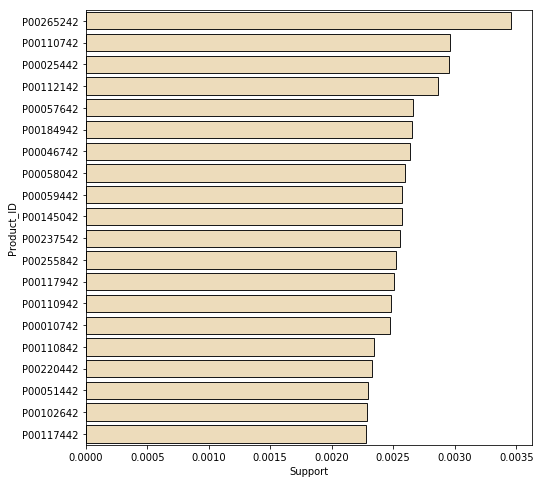

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.barplot(y="Product_ID", 
            x="Support", 
            data=Product_Support_DF.sort_values('Support', ascending = False).head(20), 
            color= "wheat", 
            edgecolor=".1" )

##### Support  for say product_ID -P00265242

In [12]:
sum(Reduced_DF['Product_ID'] == 'P00265242')/ Reduced_DF.shape[0]

0.0034562490582744423

In [15]:
blackfriday_df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20             A   
13      1000005  P00145042      M  26-35          20             A   
14      1000006  P00231342      F  51-55           9             A   
15      1000006  P00190242      F  51-55           9             A   
16      1000006   P0096642      F  51-55           9             A   
17      1000006  P00058442      F  51-55           9             A   
18      1000007  P00036842      M  36-45           1             B   
19      1000008  P00249542      M  26-35          12             C   
20      1000008  P00220442      M  26-35          12             C   
21      1000008  P00156442      M  26-35          12             C   
22      1000008  P00213742      M  26-35          12             C   
23      1000008  P00214442      M  26-35          12             C   
24      1000008  P00303442      M  26-35          12             C   
25      1000009  P00135742      M  26-35          17             C   
26      1000009  P00039942      M  26-35          17             C   
27      1000009  P00161442      M  26-35          17             C   
28      1000009  P00078742      M  26-35          17             C   
29      1000010  P00085942      F  36-45           1             B   
...         ...        ...    ...    ...         ...           ...   
537547  1004733  P00244042      M  18-25          18             C   
537548  1004734  P00111042      M  51-55           1             B   
537549  1004734  P00345842      M  51-55           1             B   
537550  1004735  P00278242      M  46-50           3             C   
537551  1004735  P00313442      M  46-50           3             C   
537552  1004735   P0098642      M  46-50           3             C   
537553  1004735  P00119342      M  46-50           3             C   
537554  1004735  P00114042      M  46-50           3             C   
537555  1004735  P00135142      M  46-50           3             C   
537556  1004736  P00194542      M  18-25          20             A   
537557  1004736  P00175242      M  18-25          20             A   
537558  1004736  P00101942      M  18-25          20             A   
537559  1004736  P00109142      M  18-25          20             A   
537560  1004736  P00084842      M  18-25          20             A   
537561  1004736  P00078142      M  18-25          20             A   
537562  1004736  P00146742      M  18-25          20             A   
537563  1004736  P00154642      M  18-25          20             A   
537564  1004736  P00117442      M  18-25          20             A   
537565  1004736  P00051142      M  18-25          20             A   
537566  1004736  P00048742      M  18-25          20             A   
537567  1004736  P00157542      M  18-25          20             A   
537568  1004736  P00250642      M  18-25          20             A   
537569  1004736  P00023142      M  18-25          20             A   
537570  1004736  P00162442      M  18-25          20             A   
537571  1004737  P00221442      M  36-45          16             C   
537572  1004737  P

In [8]:
a = blackfriday_df.groupby(['User_ID','Product_ID'])['Product_ID'].count().unstack().reset_index().fillna(0).set_index('User_ID')
coocc = a.T.dot(a)
coocc
np.fill_diagonal(coocc.values, 0)


In [7]:
# a

In [6]:
coocc.to_csv('coocc.csv')

In [91]:
coocc.head()

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
Product_ID                                                                     
P00000142         0.0      152.0       87.0       43.0       57.0      174.0   
P00000242       152.0        0.0       44.0       14.0       28.0       70.0   
P00000342        87.0       44.0        0.0       19.0       31.0       33.0   
P00000442        43.0       14.0       19.0        0.0       20.0       24.0   
P00000542        57.0       28.0       31.0       20.0        0.0       22.0   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098942  \
Product_ID                                              ...             
P00000142        87.0       15.0       15.0      170.0  ...       9.0   
P00000242        38.0       13.0       14.0      110.0  ...       2.0   
P00000342        49.0        5.0        8.0       58.0  ...       3.0   
P00000442        25.0        1.0        4.0       20.0  ...       7.0   
P00000542        28.0        3.0       13.0       35.0  ...       5.0   

Product_ID  P0099042  P0099142  P0099242  P0099342  P0099442  P0099642  \
Product_ID                                                               
P00000142       48.0       2.0      86.0     160.0      76.0       3.0   
P00000242       22.0       1.0      49.0      52.0      33.0       1.0   
P00000342       17.0       1.0      29.0      40.0      28.0       1.0   
P00000442        8.0       0.0      21.0      20.0      12.0       3.0   
P00000542       11.0       1.0      20.0      21.0      17.0       0.0   

Product_ID  P0099742  P0099842  P0099942  
Product_ID                                
P00000142       49.0      24.0       4.0  
P00000242       28.0      12.0       2.0  
P00000342       22.0       8.0       2.0  
P00000442        7.0       5.0       1.0  
P00000542       17.0       3.0       0.0  

[5 rows x 3623 columns]

In [6]:
from sklearn.metrics.pairwise import pairwise_distances

jacsimprod = 1 - pairwise_distances(coocc, metric = "cosine")
jacsimprod = pd.DataFrame(jacsimprod, index=coocc.columns, columns=coocc.columns)
jacsimprod

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
Product_ID                                                                     
P00000142    1.000000   0.969368   0.961273   0.928632   0.940660   0.964912   
P00000242    0.969368   1.000000   0.969853   0.929366   0.954868   0.962438   
P00000342    0.961273   0.969853   1.000000   0.953940   0.973101   0.946788   
P00000442    0.928632   0.929366   0.953940   1.000000   0.953923   0.919079   
P00000542    0.940660   0.954868   0.973101   0.953923   1.000000   0.926966   
P00000642    0.964912   0.962438   0.946788   0.919079   0.926966   1.000000   
P00000742    0.952234   0.945652   0.969582   0.961336   0.962722   0.928856   
P00000842    0.899510   0.914741   0.908748   0.881888   0.905045   0.871560   
P00000942    0.885067   0.925784   0.918127   0.888857   0.924941   0.921336   
P00001042    0.963448   0.980623   0.959027   0.918246   0.943120   0.977947   
P00001142    0.977184   0.962845   0.973392   0.959328   0.961461   0.958711   
P00001242    0.913245   0.942436   0.948565   0.907862   0.940702   0.902380   
P00001342    0.907218   0.934987   0.921980   0.886039   0.915577   0.882725   
P00001442    0.929624   0.913650   0.920845   0.924238   0.905045   0.934042   
P00001542    0.916717   0.947956   0.942850   0.910488   0.934365   0.929885   
P00001642    0.967164   0.955638   0.952851   0.938950   0.935709   0.980479   
P00001742    0.955851   0.916827   0.929695   0.929681   0.904766   0.924675   
P00001842    0.940304   0.950006   0.945829   0.931435   0.937433   0.955527   
P00001942    0.940612   0.959063   0.972820   0.947429   0.974191   0.933663   
P00002042    0.899359   0.940257   0.933215   0.903096   0.931061   0.937026   
P00002142    0.981055   0.969182   0.962662   0.934034   0.942243   0.982482   
P00002242    0.948606   0.956991   0.954853   0.941765   0.944175   0.973412   
P00002342    0.911717   0.941807   0.938234   0.919959   0.936561   0.943071   
P00002442    0.957433   0.968889   0.957519   0.925970   0.942133   0.963030   
P00002542    0.969086   0.936910   0.944796   0.941429   0.923698   0.962201   
P00002642    0.939492   0.939426   0.940978   0.937294   0.927897   0.929491   
P00002742    0.870818   0.867755   0.899201   0.931505   0.901935   0.852900   
P00002842    0.884778   0.840230   0.855768   0.866844   0.826741   0.848182   
P00002942    0.957486   0.948042   0.926767   0.899018   0.895466   0.953168   
P00003042    0.850818   0.802060   0.803306   0.812891   0.774396   0.835196   
...               ...        ...        ...        ...        ...        ...   
P0096942     0.943397   0.965947   0.952449   0.913511   0.942649   0.915815   
P0097042     0.931129   0.926883   0.917582   0.904711   0.896483   0.953248   
P0097142     0.970325   0.949660   0.949219   0.918047   0.917287   0.943203   
P0097242     0.977202   0.969355   0.953859   0.915273   0.926328   0.979418   
P0097342     0.949017   0.974841   0.949957   0.904381   0.928478   0.961499   
P0097442     0.639117   0.596540   0.612858   0.648397   0.592785   0.635361   
P0097542     0.266176   0.239574   0.237707   0.230723   0.208904   0.255213   
P0097642     0.246034   0.223220   0.239649   0.262118   0.221398   0.243741   
P0097742     0.921605   0.868324   0.874566   0.881565   0.841528   0.900084   
P0097842     0.973728   0.962178   0.974471   0.957576   0.968167   0.951376   
P0097942     0.906585   0.912001   0.936912   0.953444   0.932976   0.894083   
P0098042     0.813334   0.781904   0.806404   0.839506   0.786835   0.804304   
P0098142     0.892577   0.862144   0.860412   0.863213   0.829740   0.873351   
P0098242     0.943841   0.965168   0.947748   0.920607   0.936691   0.975349   
P0098342     0.947865   0.973168   0.953961   0.914649   0.940168   0.973927   
P0098442     0.923942   0.892143   0.898436   0.901801   0.873498   0.916861   
P0098542     0.891571   0.870058   0.889080   0.905330   0.873127   0.902918   


In [12]:
# a

In [15]:
recommsim = a.dot(jacsimprod)
# recommsim = jacsimprod*(1-a)

In [16]:
recommsim

Product_ID   P00000142   P00000242   P00000342   P00000442   P00000542  \
User_ID                                                                  
1000001      32.717656   32.167688   31.998008   31.127812   31.157360   
1000002      72.426492   71.674481   71.189025   69.240699   69.436548   
1000003      28.194415   27.993590   27.693264   26.693897   27.050424   
1000004      12.610941   12.513520   12.271173   11.742784   11.884076   
1000005      99.593851   97.398032   97.472861   96.386797   95.088557   
1000006      43.664802   43.301218   43.270733   42.109179   42.329013   
1000007      15.493867   15.517593   15.251281   14.658865   14.899033   
1000008      72.599202   71.645701   71.613488   70.641855   70.185902   
1000009      55.279283   54.255811   54.063339   52.855069   52.859347   
1000010     211.749565  210.735789  209.742753  203.046966  204.963098   
1000011      66.275264   65.139414   65.204820   63.858154   63.899024   
1000012      10.413488   10.215087   10.153441    9.866187    9.863311   
1000013      57.714507   57.862208   57.020020   54.862429   55.674398   
1000014      12.620823   12.388508   12.287785   11.936598   11.980287   
1000015     111.713687  111.076005  110.615329  107.846088  108.671726   
1000016      19.941743   19.958276   19.975630   19.392606   19.733091   
1000017     107.731649  107.223879  105.805840  101.960426  102.726537   
1000018     171.417339  171.693877  170.038840  164.482879  166.505547   
1000019     137.464076  137.329733  135.719657  130.611547  132.357001   
1000020      11.654966   11.593179   11.426665   11.005413   11.148981   
1000021      12.251824   12.310425   12.157482   11.684148   11.918722   
1000022     148.548699  148.951044  148.053668  143.385458  145.460982   
1000023     163.155497  161.946172  160.078129  154.759030  155.550360   
1000024      73.433855   72.487960   72.366578   70.453337   70.771913   
1000025      41.352178   41.546718   40.911283   39.276148   40.021086   
1000026     215.249513  215.126647  215.771647  210.919706  212.678176   
1000027      38.724531   37.742985   37.518513   36.356065   36.224160   
1000028      54.611360   53.474477   53.242055   51.762118   51.652566   
1000029      49.260739   49.428831   48.484540   46.285203   47.048956   
1000030      28.335106   27.584979   27.480232   26.922163   26.706224   
...                ...         ...         ...         ...         ...   
1006011      94.863690   94.691873   93.503707   90.082233   91.098886   
1006012      14.095474   13.891481   13.830664   13.555107   13.521936   
1006013      67.490172   66.053107   65.982745   64.631302   64.183203   
1006014      50.948616   49.967994   49.678142   48.173955   48.066448   
1006015      31.098334   30.440440   30.345789   29.508469   29.607143   
1006016     437.306356  431.319789  431.667834  423.053222  421.367046   
1006017      13.806335   13.704399   13.658560   13.256323   13.297548   
1006018      72.744108   72.900939   71.757560   68.918202   69.882444   
1006019      41.927221   42.354256   41.815575   40.319091   41.051804   
1006020      21.643957   21.362904   21.068465   20.249611   20.335771   
1006021      61.507482   61.303258   60.491027   58.110888   58.874747   
1006022      23.368885   23.043628   22.895520   22.157151   22.317578   
1006023      73.440681   74.230670   73.209467   70.678024   71.904924   
1006024      52.934349   52.799388   52.308674   50.554278   51.199770   
1006025     134.257683  134.082804  134.345435  131.325023  131.963671   
1006026      40.254979   40.156784   39.491753   37.857313   38.297788   
1006027      21.308899   21.123742   20.991909   20.378142   20.551655   
1006028      24.723159   24.656793   24.327175   23.496962   23.719566   
1006029      13.305259   13.152373   13.142078   12.858120   12.843925   
1006030      50.763150   51.276831   50.301380   48.052858   49.028332   
1006031      28.717805   28.455630   28.330625   27.569499   27.707015   
1006

In [17]:
from sklearn.cluster import KMeans


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(coocc)
    wcss.append(kmeans.inertia_)

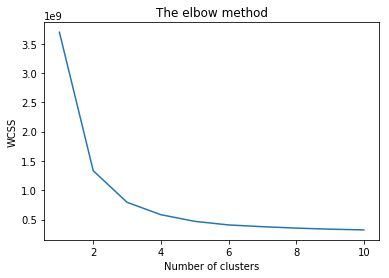

In [19]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(coocc)
centroids = kmeans.cluster_centers_
print(centroids)



[[ 10.97118564   5.38686821   4.02267359 ...   2.09494568   1.73689183
    0.4449693 ]
 [138.27294118  62.44235294  39.85176471 ...  20.41176471  13.84
    2.27529412]
 [266.91366906 108.35251799  64.3381295  ...  33.05035971  23.56834532
    3.49640288]
 [ 58.36624204  28.65498938  19.07643312 ...  10.07324841   7.20700637
    1.42144374]]


In [21]:
labels = kmeans.labels_
labels

array([2, 1, 3, ..., 3, 0, 0])

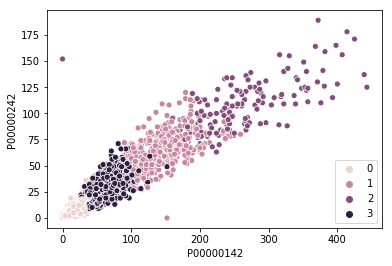

In [34]:
import seaborn as sns
sns.scatterplot(coocc['P00000142'],coocc['P00000242'],hue=labels);

In [7]:
pr=[]
re=[]
for i in coocc.columns:
    pr.append(coocc[coocc[i] == max(coocc[i])].index[0])
    re.append(coocc[coocc[i] == max(coocc[i])].values[0][0])
df = pd.DataFrame({'recomm':pr,'value':re},index=coocc.columns)    

In [14]:
# list of valuable customers from FM score 

catofinterest = [1000195, 1000216, 1000245, 1000302, 1000319, 1000329, 1000352,1000424, 1000482, 1000524, 1000531, 1000549, 1000550, 1000678,1000710, 1000752, 1000770, 1000839, 1000869, 1000881, 1000889,1001010, 1001015, 1001019, 1001051, 1001088, 1001117, 1001150,1001181, 1001203, 1001285, 1001317, 1001340, 1001383, 1001425,1001447, 1001448, 1001449, 1001579, 1001605, 1001613, 1001632,1001635, 1001647, 1001676, 1001680, 1001733, 1001737, 1001835,1001837, 1001880, 1001899, 1001912, 1001941, 1001958, 1001980,1002015, 1002063, 1002106, 1002116, 1002181, 1002304, 1002507,1002529, 1002665, 1002777, 1002793, 1002820, 1002857, 1002907,1002909, 1003029, 1003032, 1003067, 1003224, 1003272, 1003292,1003311, 1003391, 1003401, 1003471, 1003507, 1003526, 1003539,1003618, 1003626, 1003650, 1003675, 1003705, 1003778, 1003792,1003808, 1003824, 1003829, 1003841, 1004021, 1004041, 1004048,1004064, 1004083, 1004085, 1004140, 1004227, 1004238, 1004277,1004312, 1004344, 1004386, 1004425, 1004447, 1004448, 1004482,1004508, 1004510, 1004543, 1004647, 1004682, 1004725, 1004728,1004808, 1004979, 1005026, 1005046, 1005100, 1005111, 1005256,1005333, 1005367, 1005394, 1005627, 1005636, 1005643, 1005788,1005795, 1005812, 1005831, 1005954, 1006016, 1006036]


In [15]:
# recommvector
# a.loc[catofinterest]

In [16]:
recommvector = a.loc[catofinterest].dot(coocc)
recommvector = recommvector*(1-a.loc[catofinterest])
recommvector.head()


Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
User_ID                                                                        
1000195       48402.0        0.0    13417.0     6303.0     9647.0    27950.0   
1000216       44441.0    19382.0        0.0        0.0     9138.0    24332.0   
1000245       48616.0    23028.0    13947.0     6080.0     9759.0    29118.0   
1000302           0.0        0.0    15802.0     7205.0    11690.0    31824.0   
1000319       45397.0    18910.0    12597.0     6319.0     9049.0        0.0   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098942  \
User_ID                                                 ...             
1000195       13675.0        0.0     4218.0    28483.0  ...    2400.0   
1000216       13720.0     2102.0     3529.0        0.0  ...    2328.0   
1000245       13694.0     2373.0     4446.0    30508.0  ...    2330.0   
1000302       16091.0     2647.0     5185.0    32998.0  ...    2596.0   
1000319       14195.0     2080.0     3639.0    24580.0  ...    2566.0   

Product_ID  P0099042  P0099142  P0099242  P0099342  P0099442  P0099642  \
User_ID                                                                  
1000195       8589.0     426.0       0.0   24220.0   13240.0     696.0   
1000216       8637.0     388.0   13687.0   21725.0   12023.0     660.0   
1000245       8625.0     435.0   14732.0   23332.0   13106.0     657.0   
1000302       9433.0     432.0   17449.0       0.0   14984.0     721.0   
1000319       8820.0     437.0   14683.0   23069.0       0.0     709.0   

Product_ID  P0099742  P0099842  P0099942  
User_ID                                   
1000195          0.0    4571.0     745.0  
1000216       6388.0    5055.0     908.0  
1000245       7278.0    5096.0     936.0  
1000302       8347.0    4891.0     856.0  
1000319       5977.0    4761.0     809.0  

[5 rows x 3623 columns]

In [17]:
recommvector = recommvector.T


In [18]:
a.loc[catofinterest].head()

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
User_ID                                                                        
1000195           0.0        1.0        0.0        0.0        0.0        0.0   
1000216           0.0        0.0        1.0        1.0        0.0        0.0   
1000245           0.0        0.0        0.0        0.0        0.0        0.0   
1000302           1.0        1.0        0.0        0.0        0.0        0.0   
1000319           0.0        0.0        0.0        0.0        0.0        1.0   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098942  \
User_ID                                                 ...             
1000195           0.0        1.0        0.0        0.0  ...       0.0   
1000216           0.0        0.0        0.0        1.0  ...       0.0   
1000245           0.0        0.0        0.0        0.0  ...       0.0   
1000302           0.0        0.0        0.0        0.0  ...       0.0   
1000319           0.0        0.0        0.0        0.0  ...       0.0   

Product_ID  P0099042  P0099142  P0099242  P0099342  P0099442  P0099642  \
User_ID                                                                  
1000195          0.0       0.0       1.0       0.0       0.0       0.0   
1000216          0.0       0.0       0.0       0.0       0.0       0.0   
1000245          0.0       0.0       0.0       0.0       0.0       0.0   
1000302          0.0       0.0       0.0       1.0       0.0       0.0   
1000319          0.0       0.0       0.0       0.0       1.0       0.0   

Product_ID  P0099742  P0099842  P0099942  
User_ID                                   
1000195          1.0       0.0       0.0  
1000216          0.0       0.0       0.0  
1000245          0.0       0.0       0.0  
1000302          0.0       0.0       0.0  
1000319          0.0       0.0       0.0  

[5 rows x 3623 columns]

In [19]:
recommvector.head()

User_ID     1000195  1000216  1000245  1000302  1000319  1000329  1000352  \
Product_ID                                                                  
P00000142   48402.0  44441.0  48616.0      0.0  45397.0      0.0      0.0   
P00000242       0.0  19382.0  23028.0      0.0  18910.0  24255.0  23026.0   
P00000342   13417.0      0.0  13947.0  15802.0  12597.0      0.0  14503.0   
P00000442    6303.0      0.0   6080.0   7205.0   6319.0      0.0   6928.0   
P00000542    9647.0   9138.0   9759.0  11690.0   9049.0      0.0      0.0   

User_ID     1000424  1000482  1000524  ...  1005627  1005636  1005643  \
Product_ID                             ...                              
P00000142       0.0  47996.0  55448.0  ...      0.0      0.0      0.0   
P00000242       0.0  21281.0  24356.0  ...  21400.0  21336.0      0.0   
P00000342   19565.0      0.0      0.0  ...  13150.0  13489.0  15823.0   
P00000442    9050.0   6880.0   7537.0  ...   6026.0   6454.0   7700.0   
P00000542   13760.0      0.0      0.0  ...   8981.0   9563.0  11227.0   

User_ID     1005788  1005795  1005812  1005831  1005954  1006016  1006036  
Product_ID                                                                 
P00000142   40159.0  66214.0  44089.0      0.0  51970.0      0.0  44836.0  
P00000242   19056.0  30044.0  18904.0  29284.0  24413.0  20460.0  19345.0  
P00000342   12174.0  19220.0  12682.0  18771.0  15145.0  13137.0  12100.0  
P00000442    5522.0   9258.0   6296.0   8869.0   6928.0   6503.0      0.0  
P00000542    8885.0  13858.0      0.0  13324.0  10625.0   9398.0   8444.0  

[5 rows x 139 columns]

In [246]:
from sklearn.metrics.pairwise import pairwise_distances

jacsim = 1 - pairwise_distances(recommvector.T, metric = "cosine")
jacsim = pd.DataFrame(jacsim, index=recommvector.columns, columns=recommvector.columns)
jacsim

User_ID   1000001   1000002   1000003   1000004   1000005   1000006   1000007  \
User_ID                                                                         
1000001  1.000000  0.898434  0.916883  0.947801  0.916511  0.932310  0.941418   
1000002  0.898434  1.000000  0.913821  0.908850  0.883735  0.924148  0.910517   
1000003  0.916883  0.913821  1.000000  0.934724  0.891683  0.934606  0.933238   
1000004  0.947801  0.908850  0.934724  1.000000  0.909371  0.944235  0.950135   
1000005  0.916511  0.883735  0.891683  0.909371  1.000000  0.914653  0.920513   
1000006  0.932310  0.924148  0.934606  0.944235  0.914653  1.000000  0.945271   
1000007  0.941418  0.910517  0.933238  0.950135  0.920513  0.945271  1.000000   
1000008  0.917665  0.902272  0.910024  0.927806  0.899272  0.924834  0.938475   
1000009  0.927839  0.895331  0.905664  0.925449  0.911735  0.918848  0.924577   
1000010  0.841839  0.811488  0.834577  0.844302  0.819050  0.845897  0.846739   
1000011  0.908882  0.907099  0.931979  0.915450  0.886473  0.917314  0.923695   
1000012  0.949676  0.921986  0.945034  0.956586  0.920012  0.952466  0.954723   
1000013  0.913462  0.894983  0.910667  0.916722  0.884911  0.905625  0.915925   
1000014  0.941066  0.932974  0.941686  0.951425  0.918170  0.966837  0.952961   
1000015  0.887765  0.878457  0.891955  0.891973  0.851982  0.897783  0.885552   
1000016  0.947375  0.922519  0.939847  0.954254  0.925160  0.950481  0.960534   
1000017  0.881442  0.873847  0.875410  0.891325  0.864792  0.886318  0.878982   
1000018  0.850561  0.850119  0.847375  0.862657  0.843936  0.872845  0.858747   
1000019  0.859181  0.856428  0.862648  0.880639  0.854612  0.865216  0.853667   
1000020  0.939938  0.930955  0.930682  0.949919  0.916963  0.949195  0.960908   
1000021  0.953269  0.931429  0.948203  0.966544  0.924836  0.964912  0.964024   
1000022  0.865072  0.856734  0.879527  0.866977  0.858213  0.875120  0.883541   
1000023  0.857619  0.842694  0.839680  0.857404  0.839468  0.864625  0.863122   
1000024  0.913115  0.871771  0.899759  0.907206  0.873594  0.909308  0.913159   
1000025  0.916639  0.901088  0.922143  0.927051  0.896685  0.916696  0.924370   
1000026  0.848640  0.848057  0.844491  0.854498  0.819418  0.849374  0.854835   
1000027  0.923802  0.911894  0.939194  0.931454  0.912000  0.941036  0.934576   
1000028  0.909617  0.905032  0.934444  0.924165  0.886301  0.926737  0.915317   
1000029  0.909784  0.894360  0.914845  0.929633  0.890075  0.925308  0.925382   
1000030  0.942003  0.910378  0.926400  0.934191  0.921849  0.933264  0.937766   
...           ...       ...       ...       ...       ...       ...       ...   
1006011  0.893272  0.857704  0.869602  0.887853  0.861799  0.892378  0.883706   
1006012  0.948733  0.926793  0.945608  0.956386  0.921612  0.951813  0.961688   
1006013  0.936819  0.895207  0.916170  0.930228  0.900619  0.936610  0.934886   
1006014  0.939674  0.919154  0.921191  0.944892  0.914401  0.939036  0.934536   
1006015  0.931100  0.912904  0.929813  0.934939  0.913664  0.954411  0.937117   
1006016  0.792537  0.780373  0.782959  0.785021  0.782255  0.791464  0.778989   
1006017  0.958460  0.938441  0.954310  0.971154  0.929917  0.967456  0.965599   
1006018  0.902374  0.883541  0.881160  0.901053  0.882880  0.895271  0.903552   
1006019  0.923794  0.917586  0.929711  0.949932  0.902343  0.936191  0.949564   
1006020  0.933796  0.928209  0.938454  0.953074  0.913152  0.946416  0.948289   
1006021  0.898016  0.872396  0.897304  0.895623  0.883927  0.892943  0.909290   
1006022  0.943060  0.906747  0.920940  0.954577  0.900089  0.938756  0.939054   
1006023  0.918750  0.892350  0.907370  0.925080  0.892914  0.920908  0.918461   
1006024  0.912862  0.892962  0.903448  0.918422  0.902334  0.919021  0.920591   
1006025  0.912649  0.892075  0.907374  0.916950  0.874935  0.920911  0.917604   
1006026  0.922620  0.909538  0.920821  0.929517  0.898626  0.930853  0.926724   
1006027  0.929906  0.919860  0.

In [ ]:
sns.

In [254]:
jacsim[1006039][jacsim[1006039]!=1].sort_values(ascending=False).index[0]
jacsim[1005215][1006039]

0.9596435376888094

In [135]:
import seaborn as sns 
recommvector[recommvector[1004277]==94704.0][1004277]

Product_ID
P00110742    94704.0
Name: 1004277, dtype: float64

In [120]:
recommvector.values[1]

array([2532., 5179., 2993., ...,  593., 3380., 8677.])

In [12]:
recommvector.to_csv('recommendations.csv')

In [180]:
list(recommvector.max().values)

[8221.0,
 15592.0,
 9295.0,
 5473.0,
 16442.0,
 8360.0,
 5122.0,
 14576.0,
 13523.0,
 39937.0,
 14283.0,
 2154.0,
 15120.0,
 3700.0,
 24177.0,
 3398.0,
 24773.0,
 31695.0,
 31449.0,
 3860.0,
 2431.0,
 27682.0,
 32532.0,
 17905.0,
 11075.0,
 34632.0,
 8512.0,
 14026.0,
 12036.0,
 7632.0,
 10473.0,
 4558.0,
 38930.0,
 17997.0,
 15941.0,
 42358.0,
 6804.0,
 8212.0,
 3761.0,
 28923.0,
 3630.0,
 26173.0,
 20158.0,
 1469.0,
 4206.0,
 57445.0,
 13796.0,
 3856.0,
 4828.0,
 9926.0,
 55637.0,
 4745.0,
 4029.0,
 11011.0,
 6777.0,
 49415.0,
 21907.0,
 6284.0,
 2740.0,
 40271.0,
 11531.0,
 4292.0,
 16300.0,
 5365.0,
 6216.0,
 9424.0,
 7525.0,
 7069.0,
 4083.0,
 6152.0,
 25455.0,
 5789.0,
 12867.0,
 9996.0,
 4946.0,
 12796.0,
 2335.0,
 8180.0,
 9598.0,
 14143.0,
 11790.0,
 8900.0,
 3450.0,
 4984.0,
 9582.0,
 8644.0,
 2976.0,
 22160.0,
 5395.0,
 33372.0,
 23189.0,
 1060.0,
 14493.0,
 13534.0,
 10738.0,
 3983.0,
 13498.0,
 12104.0,
 14517.0,
 13590.0,
 13627.0,
 4593.0,
 9348.0,
 5878.0,
 10615.0,
 28

In [166]:
# recommvector[1000001].sort_values(ascending=False)[1]

8177.0

In [268]:
# recommvector.sort_values(recommvector[1000001],ascending=False)[1000001]
recommvector[1000001].index[:10]

Index(['P00000142', 'P00000242', 'P00000342', 'P00000442', 'P00000542',
       'P00000642', 'P00000742', 'P00000842', 'P00000942', 'P00001042'],
      dtype='object', name='Product_ID')

In [200]:
# def nhighest(x):
pr=[]
re=[]
for i in recommvector.columns:
#     pr.append(recommvector[recommvector[i] == max(recommvector[i])].index[0])
    pr.append(recommvector[i].sort_values(ascending=False).index[3])
    re.append(recommvector[i].sort_values(ascending=False)[3])


In [48]:
dic = {}
dic2 = {}
for i in recommvector.columns:
    for j in range(0,40):
        #     pr.append(recommvector[recommvector[i] == max(recommvector[i])].index[0])
        dic2.update({recommvector[i].sort_values(ascending=False).index[j]:recommvector[i].sort_values(ascending=False).values[j]})
        dic.update({i:dic2})
#     re.append(recommvector[i].sort_values(ascending=False)[3])

In [164]:
11523.86*36*139

57665395.440000005

In [163]:
xx = [414858.96,368763.52,322668.08,276572.64]
# sns.barplot(x=[36,32,28,24],y=(),palette='summer')
# plt.title()
xx*139

[414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276572.64,
 414858.96,
 368763.52,
 322668.08,
 276

In [1]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Pie(
#     values=[50, 10, 10, 10,10],
#     labels=['~',"low",'medium','High','Very High'],
#     domain={"x": [0, .48]},
#     marker_colors=[
#             'rgb(255, 255, 255)',
#             'rgb(232,226,202)',
#             'rgb(226,210,172)',
#             'rgb(223,189,139)',
#             'rgb(223,162,103)'
#         ],
#     name="Gauge",
#     hole=.3,
#     direction="clockwise",
#     rotation=90,
#     showlegend=False,
#     hoverinfo="none",
#     textinfo="label",
#     textposition="inside"
# ))

# # For numerical labels
# fig.add_trace(go.Pie(
#     values=[40, 10, 10, 10, 10],
#     labels=['~',"60",'70',"80", "100"],
#     domain={"x": [0, .48]},
#     marker_colors=['rgba(255, 255, 255, 0)']*7,
#     hole=.4,
#     direction="clockwise",
#     rotation=108,
#     showlegend=False,
#     hoverinfo="none",
#     textinfo="label",
#     textposition="outside"
# ))

# fig.update_layout(
#     xaxis=dict(
#         showticklabels=False,
#         showgrid=False,
#         zeroline=False,
#     ),
#     yaxis=dict(
#         showticklabels=False,
#         showgrid=False,
#         zeroline=False,
#     ),
#     shapes=[dict(
#                 type='path',
#                 path='M 0.235 0.5 L 0.24 0.65 L 0.245 0.5 Z',
#                 fillcolor='rgba(44, 160, 101)',
#                 line_width=0.5,
#                 xref='paper',
#                 yref='paper')
#     ],
#     annotations=[
#         dict(xref='paper',
#              yref='paper',
#              x=0.23,
#              y=0.45,
#             text='75',
#             showarrow=False
#         )
#     ]
# )

# fig.show()

# Top 40 products for each customer 

In [20]:
dic1 = {}
dicval = {}
for i in recommvector.columns:
    dicval.update({i:recommvector[i].sort_values(ascending=False)[:40]})

#     re.append(recommvector[i].sort_values(ascending=False)[3])

    #     pr.append(recommvector[recommvector[i] == max(recommvector[i])].index[0])
#     dic1.update({i:recommvector[i].sort_values(ascending=False).index[:100]})

In [21]:
temp = pd.DataFrame(dic1)
tempval = pd.DataFrame(dicval)
len(set(temp.values.flatten()))
tempval

1000195  1000216  1000245  1000302  1000319  1000329  1000352  \
P00000142  48402.0  44441.0  48616.0      NaN  45397.0      NaN      NaN   
P00002142      NaN      NaN      NaN  40807.0      NaN      NaN  39232.0   
P00003242  42624.0      NaN      NaN      NaN  37333.0      NaN      NaN   
P00003442      NaN  37973.0  40024.0      NaN  39254.0  44912.0  42159.0   
P00003942      NaN      NaN      NaN      NaN      NaN  40707.0      NaN   
P00004742      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00005042      NaN  39651.0  44322.0      NaN  41983.0      NaN      NaN   
P00010742  51781.0  46596.0  53772.0      NaN  48892.0  57036.0  55305.0   
P00021742      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00025442      NaN  54809.0      NaN      NaN  54471.0      NaN      NaN   
P00028842      NaN      NaN      NaN      NaN      NaN  55080.0  53781.0   
P00031042      NaN  44389.0      NaN      NaN      NaN      NaN      NaN   
P00034742  49721.0  46407.0      NaN  56194.0  47808.0      NaN  53537.0   
P00034842      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00035842      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00036842      NaN  38616.0      NaN  49467.0      NaN      NaN      NaN   
P00037142      NaN      NaN      NaN  45117.0  35772.0  43793.0      NaN   
P00044442      NaN      NaN  52172.0      NaN  46850.0      NaN  53691.0   
P00046742      NaN  50496.0      NaN      NaN      NaN  63288.0  60508.0   
P00051442      NaN  43249.0      NaN      NaN      NaN      NaN      NaN   
P00052842      NaN      NaN      NaN  46413.0  39527.0      NaN      NaN   
P00057442      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00057542      NaN      NaN      NaN  39998.0      NaN      NaN      NaN   
P00057642  57092.0      NaN      NaN  63574.0  51284.0      NaN      NaN   
P00057742  38637.0      NaN      NaN      NaN  37393.0  42987.0      NaN   
P00057942  42125.0  39583.0      NaN  47624.0  38664.0      NaN  45938.0   
P00058042      NaN  50900.0  56949.0  61059.0  53945.0      NaN  59278.0   
P00059442  53757.0  49400.0      NaN  58057.0      NaN  58585.0      NaN   
P00062842      NaN  37110.0      NaN      NaN      NaN      NaN  44956.0   
P00070042  38342.0      NaN  40385.0      NaN      NaN      NaN  41357.0   
...            ...      ...      ...      ...      ...      ...      ...   
P00220442  46235.0  43822.0  46151.0      NaN      NaN      NaN      NaN   
P00221442  39459.0  38477.0  43815.0      NaN  36501.0      NaN      NaN   
P00237542      NaN  48875.0      NaN      NaN      NaN  61792.0  59137.0   
P00240142      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00242742  48600.0  41589.0  50473.0      NaN  42015.0      NaN      NaN   
P00243942      NaN      NaN      NaN      NaN      NaN      NaN  40067.0   
P00245642      NaN      NaN      NaN      NaN      NaN  38874.0      NaN   
P00248142      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00249542      NaN      NaN  39513.0      NaN      NaN      NaN      NaN   
P00249642      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00251242  49769.0  47436.0  52492.0      NaN      NaN  56539.0  54030.0   
P00255842      NaN      NaN  51186.0  57789.0  49586.0      NaN  55255.0   
P00258742      NaN      NaN      NaN  45983.0  40144.0  47135.0      NaN   
P00259342      NaN      NaN  44665.0      NaN      NaN      NaN      NaN   
P00260042      NaN      NaN      NaN      NaN      NaN  39252.0      NaN   
P00265242      NaN  56194.0      NaN      NaN  59904.0  68032.0      NaN   
P00270942      NaN  45802.0  56100.0      NaN  46147.0      NaN      NaN   
P00271142  39878.0  39582.0      NaN      NaN      NaN      NaN      NaN   
P00274942      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00277442      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
P00277642  43574.0      NaN      NaN      NaN      NaN     

In [102]:
tempval.notnull().sum(axis=1)

P00000142    75
P00002142    34
P00003242    61
P00003442    78
P00003942    15
P00004742     2
P00005042    74
P00010742    75
P00021742     1
P00025442    70
P00028842    74
P00031042    70
P00034742    71
P00034842     3
P00035842     1
P00036842    64
P00037142    59
P00044442    68
P00046742    62
P00051442    74
P00052842    63
P00057442     5
P00057542     7
P00057642    62
P00057742    69
P00057942    63
P00058042    67
P00059442    69
P00062842    67
P00070042    52
             ..
P00220442    78
P00221442    66
P00237542    71
P00240142     3
P00242742    73
P00243942    45
P00245642     6
P00248142     2
P00249542    38
P00249642     1
P00251242    62
P00255842    58
P00258742    78
P00259342    62
P00260042    12
P00265242    59
P00270942    59
P00271142    64
P00274942     1
P00277442    12
P00277642    64
P00278642    75
P00295942    67
P00318742    35
P00321742     1
P00323942    58
P00324942     1
P00329542    27
P00334242    74
P0097242     69
Length: 115, dtype: int6

In [414]:
tdf = pd.DataFrame(dic)
tdf

1000001  1000002  1000003  1000004  1000005  1000006  1000007  \
P00000142   8840.0   8840.0   8840.0   8840.0   8840.0   8840.0   8840.0   
P00000642   2285.0   2285.0   2285.0   2285.0   2285.0   2285.0   2285.0   
P00001042  13755.0  13755.0  13755.0  13755.0  13755.0  13755.0  13755.0   
P00001142  25000.0  25000.0  25000.0  25000.0  25000.0  25000.0  25000.0   
P00002142  16679.0  16679.0  16679.0  16679.0  16679.0  16679.0  16679.0   
P00002542   4048.0   4048.0   4048.0   4048.0   4048.0   4048.0   4048.0   
P00003242   6525.0   6525.0   6525.0   6525.0   6525.0   6525.0   6525.0   
P00003442  19768.0  19768.0  19768.0  19768.0  19768.0  19768.0  19768.0   
P00003942  16428.0  16428.0  16428.0  16428.0  16428.0  16428.0  16428.0   
P00004742  15131.0  15131.0  15131.0  15131.0  15131.0  15131.0  15131.0   
P00005042   7689.0   7689.0   7689.0   7689.0   7689.0   7689.0   7689.0   
P00006942   3558.0   3558.0   3558.0   3558.0   3558.0   3558.0   3558.0   
P00010742  23965.0  23965.0  23965.0  23965.0  23965.0  23965.0  23965.0   
P00010842   6245.0   6245.0   6245.0   6245.0   6245.0   6245.0   6245.0   
P00014542  15330.0  15330.0  15330.0  15330.0  15330.0  15330.0  15330.0   
P00016042  37086.0  37086.0  37086.0  37086.0  37086.0  37086.0  37086.0   
P00019142   1189.0   1189.0   1189.0   1189.0   1189.0   1189.0   1189.0   
P00021742  15831.0  15831.0  15831.0  15831.0  15831.0  15831.0  15831.0   
P00022942   8552.0   8552.0   8552.0   8552.0   8552.0   8552.0   8552.0   
P00024742   3024.0   3024.0   3024.0   3024.0   3024.0   3024.0   3024.0   
P00025442  28994.0  28994.0  28994.0  28994.0  28994.0  28994.0  28994.0   
P00028842  25229.0  25229.0  25229.0  25229.0  25229.0  25229.0  25229.0   
P00030842  29022.0  29022.0  29022.0  29022.0  29022.0  29022.0  29022.0   
P00031042  24062.0  24062.0  24062.0  24062.0  24062.0  24062.0  24062.0   
P00032042  11863.0  11863.0  11863.0  11863.0  11863.0  11863.0  11863.0   
P00033042    554.0    554.0    554.0    554.0    554.0    554.0    554.0   
P00034042   3114.0   3114.0   3114.0   3114.0   3114.0   3114.0   3114.0   
P00034742  22538.0  22538.0  22538.0  22538.0  22538.0  22538.0  22538.0   
P00034842  16041.0  16041.0  16041.0  16041.0  16041.0  16041.0  16041.0   
P00035542  29393.0  29393.0  29393.0  29393.0  29393.0  29393.0  29393.0   
...            ...      ...      ...      ...      ...      ...      ...   
P00313342  15176.0  15176.0  15176.0  15176.0  15176.0  15176.0  15176.0   
P00313542  14623.0  14623.0  14623.0  14623.0  14623.0  14623.0  14623.0   
P00317842   1373.0   1373.0   1373.0   1373.0   1373.0   1373.0   1373.0   
P00318742  17483.0  17483.0  17483.0  17483.0  17483.0  17483.0  17483.0   
P00319042  16016.0  16016.0  16016.0  16016.0  16016.0  16016.0  16016.0   
P00321742  15638.0  15638.0  15638.0  15638.0  15638.0  15638.0  15638.0   
P00323942   1229.0   1229.0   1229.0   1229.0   1229.0   1229.0   1229.0   
P00324942  16434.0  16434.0  16434.0  16434.0  16434.0  16434.0  16434.0   
P00326742   3250.0   3250.0   3250.0   3250.0   3250.0   3250.0   3250.0   
P00327842    867.0    867.0    867.0    867.0    867.0    867.0    867.0   
P00329542  16394.0  16394.0  16394.0  16394.0  16394.0  16394.0  16394.0   
P00331942  29932.0  29932.0  29932.0  29932.0  29932.0  29932.0  29932.0   
P00332242   1181.0   1181.0   1181.0   1181.0   1181.0   1181.0   1181.0   
P00334242  19827.0  19827.0  19827.0  19827.0  19827.0  19827.0  19827.0   
P00338442   6863.0   6863.0   6863.0   6863.0   6863.0   6863.0   6863.0   
P00343042   6359.0   6359.0   6359.0   6359.0   6359.0   6359.0   6359.0   
P00346142   6229.0   6229.0   6229.0   6229.0   6229.0   6229.0   6229.0   
P00346242   3465.0   3465.0   3465.0   3465.0   3465.0   3465.0   3465.0   
P00350942  27129.0  27129.0  27129.0  27129.0  27129.0  27129.0  27129.0   
P00351142   2424.0   2424.0   2424.0   2424.0   2424.0   2424.0   2424.0   
P00351342   1199.0   1199.0   1199.0   1199.0   1199.0   11

In [381]:
# tdf.T.apply(list)
s = ()
tdf.T[0].values.flatten()
# tdf

KeyError: 0

In [336]:
list(tdf[0].values)

KeyError: 0

In [378]:
s = {}
s.update({'a':{'d':12,'q':45},'b':{'d':65,'h':99}})
s = pd.DataFrame(s)
s

a     b
d  12.0  65.0
h   NaN  99.0
q  45.0   NaN

In [178]:
nhighest(2)

In [201]:
len(re)

5891

In [203]:
# df = pd.DataFrame({'recomm':pr,'value':list(recommvector.max().values)},index=recommvector.columns)   # 18 
# df2 = pd.DataFrame({'recomm2':pr,'value':re},index=recommvector.columns)    # 24
# df3 = pd.DataFrame({'recomm3':pr,'value':re},index=recommvector.columns)      # 30
df4 = pd.DataFrame({'recomm4':pr,'value':re},index=recommvector.columns)        # 32
                                                                                # 104

In [225]:
gdf = df.groupby('recomm').mean().sort_values('value',ascending=False)
gdf2 = df2.groupby('recomm2').mean().sort_values('value',ascending=False)
gdf3 = df3.groupby('recomm3').mean().sort_values('value',ascending=False)
gdf4 = df4.groupby('recomm4').mean().sort_values('value',ascending=False)
gdf4


value
recomm4                
P00044442  62085.000000
P00110842  37589.090909
P00010742  28148.857143
P00102642  28040.000000
P00270942  20790.140351
P00110942  20484.834043
P00117942  19092.070652
P00114942  18747.735849
P00237542  18129.591479
P00117442  17988.898551
P00046742  17866.146392
P00184942  17706.381995
P00112142  16545.746057
P00057642  16065.292174
P00080342  14639.000000
P00112542  13953.000000
P00265242  13934.094059
P00058042  13657.687395
P00059442  12406.457831
P00145042  10319.748641
P00025442   9818.060109
P00031042   8376.500000
P00255842   7536.620690
P00028842   6103.619048
P00034742   5294.083333
P00110742   4565.467890
P00000142   3975.000000
P00251242   3796.363636
P00278642   2296.714286
P00334242   1931.750000
P00148642   1617.000000
P00085942   1438.000000

In [237]:
df.sort_values('value',ascending=False)

recomm    value
User_ID                    
1004277  P00110742  94704.0
1001680  P00110742  92742.0
1001181  P00046742  89623.0
1000424  P00110742  89106.0
1001449  P00110742  87198.0
1001941  P00046742  86968.0
1003391  P00265242  85703.0
1000889  P00265242  84972.0
1003618  P00265242  83344.0
1002909  P00265242  83072.0
1001015  P00145042  81878.0
1003808  P00265242  81290.0
1000549  P00110742  80965.0
1004543  P00110742  80653.0
1004510  P00025442  80255.0
1005795  P00025442  79906.0
1005831  P00145042  79138.0
1001980  P00025442  78923.0
1001285  P00265242  78826.0
1000550  P00110742  78783.0
1004227  P00110742  78296.0
1004344  P00112142  78205.0
1001150  P00110742  76947.0
1005367  P00265242  76935.0
1004448  P00184942  76629.0
1001447  P00110742  75721.0
1000752  P00265242  75717.0
1005643  P00265242  75619.0
1001088  P00025442  75495.0
1003224  P00110742  75450.0
...            ...      ...
1004743  P00025442   1302.0
1001711  P00265242   1264.0
1005391  P00265242   1232.0
1001305  P00265242   1232.0
1001452  P00110742   1218.0
1004192  P00110742   1203.0
1004527  P00265242   1191.0
1004614  P00265242   1187.0
1001318  P00265242   1182.0
1005899  P00110742   1164.0
1000821  P00265242   1154.0
1003234  P00110742   1116.0
1002834  P00110742   1111.0
1005012  P00025442   1101.0
1002045  P00145042   1086.0
1003838  P00058042   1084.0
1000094  P00110742   1060.0
1002584  P00265242   1053.0
1003291  P00265242   1043.0
1004912  P00265242   1034.0
1004061  P00110742   1023.0
1001615  P00265242    976.0
1004211  P00110742    936.0
1005043  P00117442    879.0
1004230  P00110742    763.0
1005174  P00265242    725.0
1001864  P00265242    660.0
1002204  P00145042    582.0
1000986  P00265242    496.0
1004991  P00265242    448.0

[5891 rows x 2 columns]

In [235]:
# df.groupby('recomm').mean().sort_values('value',ascending=False)

# recdf = pd.DataFrame()
unsortedrec = pd.concat([gdf,gdf2,gdf3,gdf4]).shape
sortedrec = pd.concat([gdf,gdf2,gdf3,gdf4]).sort_values('value',ascending=False)
len(list(sortedrec.index))

104

In [238]:
sortedrec.groupby('values')

KeyError: 'values'

In [123]:
coocc

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
Product_ID                                                                     
P00000142         0.0      152.0       87.0       43.0       57.0      174.0   
P00000242       152.0        0.0       44.0       14.0       28.0       70.0   
P00000342        87.0       44.0        0.0       19.0       31.0       33.0   
P00000442        43.0       14.0       19.0        0.0       20.0       24.0   
P00000542        57.0       28.0       31.0       20.0        0.0       22.0   
P00000642       174.0       70.0       33.0       24.0       22.0        0.0   
P00000742        87.0       38.0       49.0       25.0       28.0       45.0   
P00000842        15.0       13.0        5.0        1.0        3.0        3.0   
P00000942        15.0       14.0        8.0        4.0       13.0       23.0   
P00001042       170.0      110.0       58.0       20.0       35.0      131.0   
P00001142       199.0       79.0       65.0       31.0       59.0      104.0   
P00001242        36.0       21.0       14.0        5.0       16.0       19.0   
P00001342        30.0       21.0        9.0        2.0        7.0        7.0   
P00001442        23.0       11.0        4.0        9.0       10.0       22.0   
P00001542        27.0       12.0       14.0        5.0        6.0       19.0   
P00001642       122.0       47.0       36.0       21.0       20.0      116.0   
P00001742       130.0       46.0       38.0       24.0       21.0       52.0   
P00001842        30.0       20.0       12.0        7.0        9.0       27.0   
P00001942        72.0       40.0       45.0       20.0       34.0       34.0   
P00002042        30.0       19.0       18.0        9.0       12.0       32.0   
P00002142       242.0      100.0       63.0       26.0       40.0      168.0   
P00002242        72.0       23.0       23.0       10.0       17.0       66.0   
P00002342        27.0       20.0        8.0        7.0       13.0       26.0   
P00002442        94.0       54.0       26.0        9.0       21.0       53.0   
P00002542       154.0       52.0       39.0       31.0       24.0       98.0   
P00002642        31.0       14.0        5.0        6.0        5.0       14.0   
P00002742        14.0       10.0        9.0        9.0        7.0        9.0   
P00002842        33.0        3.0        5.0        4.0        2.0       10.0   
P00002942        71.0       36.0       12.0        9.0        7.0       38.0   
P00003042         6.0        4.0        3.0        2.0        2.0        4.0   
...               ...        ...        ...        ...        ...        ...   
P0096942         74.0       37.0       20.0       12.0       21.0       25.0   
P0097042         28.0       15.0        8.0        6.0        5.0       30.0   
P0097142        148.0       59.0       51.0       17.0       27.0       66.0   
P0097242        285.0      112.0       59.0       28.0       56.0      176.0   
P0097342        114.0       67.0       39.0        9.0       19.0       82.0   
P0097442          2.0        0.0        0.0        0.0        0.0        3.0   
P0097542          0.0        0.0        0.0        0.0        0.0        0.0   
P0097642          0.0        0.0        0.0        0.0        0.0        0.0   
P0097742         63.0       19.0        9.0       11.0        8.0       38.0   
P0097842        111.0       45.0       36.0       14.0       30.0       50.0   
P0097942         27.0       12.0       12.0       13.0        7.0       11.0   
P0098042          6.0        1.0        2.0        2.0        0.0        3.0   
P0098142         14.0        4.0        3.0        4.0        2.0        5.0   
P0098242         83.0       50.0       20.0       16.0       18.0       79.0   
P0098342         85.0       66.0       29.0       14.0       23.0       76.0   
P0098442         22.0        8.0        8.0        4.0        5.0       16.0   
P0098542         13.0        2.0        7.0        3.0        5.0       14.0   


In [118]:
# for i in range(len(recommvector)):
plt.text(df[0][1],recommvector.values[1][1],recommvector.index[i])
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 432x288 with 1 Axes>

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(coocc,coocc)
cosdf = pd.DataFrame(cos,index=Reduced_DF['Product_ID'].unique(),columns=Reduced_DF['Product_ID'].unique())
cosdf

P00069042  P00248942  P00087842  P00085442  P00285442  P00193542  \
P00069042   1.000000   0.969368   0.961273   0.928632   0.940660   0.964912   
P00248942   0.969368   1.000000   0.969853   0.929366   0.954868   0.962438   
P00087842   0.961273   0.969853   1.000000   0.953940   0.973101   0.946788   
P00085442   0.928632   0.929366   0.953940   1.000000   0.953923   0.919079   
P00285442   0.940660   0.954868   0.973101   0.953923   1.000000   0.926966   
P00193542   0.964912   0.962438   0.946788   0.919079   0.926966   1.000000   
P00184942   0.952234   0.945652   0.969582   0.961336   0.962722   0.928856   
P00346142   0.899510   0.914741   0.908748   0.881888   0.905045   0.871560   
P0097242    0.885067   0.925784   0.918127   0.888857   0.924941   0.921336   
P00274942   0.963448   0.980623   0.959027   0.918246   0.943120   0.977947   
P00251242   0.977184   0.962845   0.973392   0.959328   0.961461   0.958711   
P00014542   0.913245   0.942436   0.948565   0.907862   0.940702   0.902380   
P00031342   0.907218   0.934987   0.921980   0.886039   0.915577   0.882725   
P00145042   0.929624   0.913650   0.920845   0.924238   0.905045   0.934042   
P00231342   0.916717   0.947956   0.942850   0.910488   0.934365   0.929885   
P00190242   0.967164   0.955638   0.952851   0.938950   0.935709   0.980479   
P0096642    0.955851   0.916827   0.929695   0.929681   0.904766   0.924675   
P00058442   0.940304   0.950006   0.945829   0.931435   0.937433   0.955527   
P00036842   0.940612   0.959063   0.972820   0.947429   0.974191   0.933663   
P00249542   0.899359   0.940257   0.933215   0.903096   0.931061   0.937026   
P00220442   0.981055   0.969182   0.962662   0.934034   0.942243   0.982482   
P00156442   0.948606   0.956991   0.954853   0.941765   0.944175   0.973412   
P00213742   0.911717   0.941807   0.938234   0.919959   0.936561   0.943071   
P00214442   0.957433   0.968889   0.957519   0.925970   0.942133   0.963030   
P00303442   0.969086   0.936910   0.944796   0.941429   0.923698   0.962201   
P00135742   0.939492   0.939426   0.940978   0.937294   0.927897   0.929491   
P00039942   0.870818   0.867755   0.899201   0.931505   0.901935   0.852900   
P00161442   0.884778   0.840230   0.855768   0.866844   0.826741   0.848182   
P00078742   0.957486   0.948042   0.926767   0.899018   0.895466   0.953168   
P00085942   0.850818   0.802060   0.803306   0.812891   0.774396   0.835196   
...              ...        ...        ...        ...        ...        ...   
P00149742   0.943397   0.965947   0.952449   0.913511   0.942649   0.915815   
P00164242   0.931129   0.926883   0.917582   0.904711   0.896483   0.953248   
P00091942   0.970325   0.949660   0.949219   0.918047   0.917287   0.943203   
P00078342   0.977202   0.969355   0.953859   0.915273   0.926328   0.979418   
P00083142   0.949017   0.974841   0.949957   0.904381   0.928478   0.961499   
P00172242   0.639117   0.596540   0.612858   0.648397   0.592785   0.635361   
P00353042   0.266176   0.239574   0.237707   0.230723   0.208904   0.255213   
P00172642   0.246034   0.223220   0.239649   0.262118   0.221398   0.243741   
P00038642   0.921605   0.868324   0.874566   0.881565   0.841528   0.900084   
P00211742   0.973728   0.962178   0.974471   0.957576   0.968167   0.951376   
P00073342   0.906585   0.912001   0.936912   0.953444   0.932976   0.894083   
P00299042   0.813334   0.781904   0.806404   0.839506   0.786835   0.804304   
P00201242   0.892577   0.862144   0.860412   0.863213   0.829740   0.873351   
P00062442   0.943841   0.965168   0.947748   0.920607   0.936691   0.975349   
P00074842   0.947865   0.973168   0.953961   0.914649   0.940168   0.973927   
P00132742   0.923942   0.892143   0.898436   0.901801   0.873498   0.916861   
P00301442   0.891571   0.870058   0.889080   0.905330   0.873127   0.902918   
P00298342   0.856392   0.842509   0.853739   0.872372   0.834709   0.870286   
P00352042   0.898963   0.878372   0.891109   0.909839   0.877

In [4]:
sim = blackfriday_df.groupby(['User_ID','Product_Category_1'])['Product_ID'].count().unstack().reset_index().fillna(0).set_index('User_ID')
for i in sim.columns:
    sim[i] = np.where(sim[i]>0,1,0)

sim

Product_Category_1  1   2   3   4   5   6   7   8   9   10  11  12  13  14  \
User_ID                                                                      
1000001              1   1   1   1   1   1   0   1   0   0   0   1   0   1   
1000002              1   1   0   0   1   1   0   1   0   0   0   0   0   0   
1000003              1   1   1   0   1   0   0   1   0   0   0   0   0   0   
1000004              1   0   0   0   0   0   0   0   0   0   0   0   0   0   
1000005              1   1   1   1   1   1   1   1   0   0   1   0   0   1   
1000006              1   1   1   1   1   1   0   1   0   0   0   1   0   0   
1000007              1   0   0   0   1   0   0   0   0   0   1   0   0   0   
1000008              1   1   1   0   1   1   0   1   0   0   0   0   0   0   
1000009              1   0   1   0   1   1   1   1   0   0   0   0   0   0   
1000010              1   1   1   1   1   1   1   1   0   0   1   1   1   1   
1000011              1   1   1   1   1   1   1   1   0   0   1   0   0   0   
1000012              1   1   0   0   1   1   0   1   0   1   0   0   0   0   
1000013              1   1   0   0   1   1   0   1   0   0   1   0   0   0   
1000014              1   0   0   0   1   1   0   1   0   0   0   0   0   0   
1000015              1   1   1   1   1   1   0   1   0   0   1   0   1   0   
1000016              1   1   0   0   1   0   0   1   0   0   1   0   0   0   
1000017              1   1   1   1   1   1   0   1   1   1   1   0   1   0   
1000018              1   1   1   1   1   1   0   1   0   1   0   0   0   0   
1000019              1   1   1   1   1   1   0   1   1   0   1   0   1   0   
1000020              1   0   0   0   1   0   0   0   0   0   0   0   0   0   
1000021              1   1   1   0   1   1   0   0   0   0   0   0   0   0   
1000022              1   1   1   0   1   1   0   1   0   1   1   0   1   0   
1000023              1   1   1   1   1   1   1   1   0   1   1   0   1   0   
1000024              1   1   1   0   1   1   0   1   0   0   1   0   0   0   
1000025              1   1   1   0   1   0   0   1   0   0   0   0   1   0   
1000026              1   1   1   1   1   1   0   1   0   0   1   1   1   0   
1000027              1   1   1   0   1   1   0   1   0   1   1   0   0   0   
1000028              1   0   1   1   1   1   0   1   0   1   1   0   1   0   
1000029              1   1   0   0   0   0   0   1   0   1   1   0   0   0   
1000030              1   1   1   1   1   1   1   1   0   0   1   0   0   0   
...                 ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1006011              1   1   1   1   1   1   0   1   0   0   1   0   1   0   
1006012              1   0   1   0   1   0   0   1   0   0   0   0   0   0   
1006013              1   0   1   1   1   1   1   1   0   0   1   1   1   1   
1006014              1   1   1   1   1   1   1   1   0   1   1   1   1   0   
1006015              1   0   1   1   1   1   0   1   0   0   0   0   0   0   
1006016              1   1   1   1   1   1   1   1   0   1   1   1   1   1   
1006017              1   1   0   0   1   1   0   1   0   0   0   0   0   0   
1006018              1   1   1   1   1   0   0   1   1   0   1   0   1   0   
1006019              1   1   0   0   1   1   1   1   0   1   0   0   0   0   
1006020              1   0   0   0   1   1   0   0   0   1   0   1   0   0   
1006021              1   1   1   1   1   0   0   1   0   0   1   0   1   0   
1006022              1   0   0   1   1   1   1   1   0   0   1   0   0   0   
1006023              1   0   1   0   1   1   0   1   0   0   1   0   0   0   
1006024              1   1   1   0   1   1   0   1   0   0   0   0   0   0   
1006025              1   1   1   1   1   1   0   1   0   0   1   0   1   0   
1006026              1   1   0   1   1   0   1   1   1   1   1   0   0   0   
1006027              1   0   1   0   1   0   0   1   0   0   1   0   0   0   
1006028              1   1   0   0   0   0   0   1   0   0   0   0   0   0   
1006029              1

Text(0,0.5,'Count')

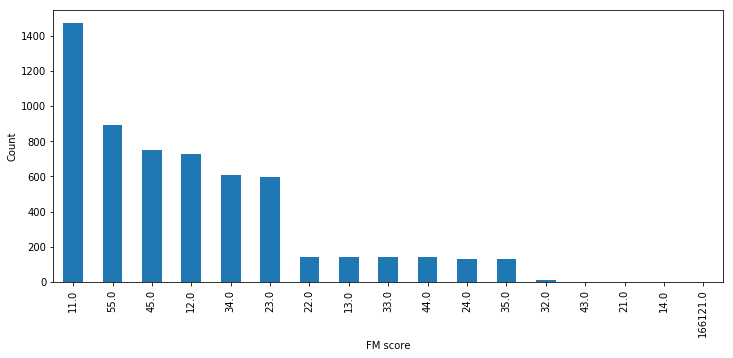

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
rfm['RFMSCORE along Table (Down)'].value_counts().plot(kind='bar')
plt.xlabel('FM score')
plt.ylabel('Count')

# sns.countplot(rfm['RFMSCORE along Table (Down)']);

In [78]:
from sklearn.metrics import jaccard_similarity_score
jac = []
for i in sim.T.columns:
    for j in sim.T.columns:
        jac.append(jaccard_similarity_score(sim.T[i].tolist(),sim.T[j].tolist()))
        
jacc = np.array(jac).reshape(16,16)
jsim = pd.DataFrame(jacc,columns=sim.T.columns,index=sim.T.columns)
jsim

KeyboardInterrupt: 

In [10]:
rfm = pd.read_csv('CrossTab_UserId_Details_RFMScore .csv',header=1)
rfm.head()

Row Labels  Frequency_Ranking along Table (Down)  Number of Records  \
0    1000001                                   1.0               34.0   
1    1000002                                   3.0               76.0   
2    1000003                                   1.0               29.0   
3    1000004                                   1.0               13.0   
4    1000005                                   4.0              106.0   

   Percentile of Number of Records along User ID  Purchase  \
0                                       0.361460  333481.0   
1                                       0.631239  810353.0   
2                                       0.313582  341635.0   
3                                       0.067742  205987.0   
4                                       0.729372  821001.0   

   Purchase_Rank along Table (Down)  RFMSCORE along Table (Down)  (blank)  \
0                               2.0                         12.0      NaN   
1                               4.0                         34.0      NaN   
2                               2.0                         12.0      NaN   
3                               1.0                         11.0      NaN   
4                               4.0                         44.0      NaN   

   Grand Total  
0  333530.3615  
1  810470.6312  
2  341679.3136  
3  206013.0677  
4  821159.7294

In [7]:
# sim = np.where(sim[1]>0,1,0)
sim2 = sim
sim2['class'] = rfm['RFMSCORE along Table (Down)'].reset_index(drop=True).values
sim2.tail()

ValueError: Length of values does not match length of index

In [88]:
userclasses = pd.pivot_table(sim2,index='class',aggfunc=pd.Series.mode)
userclasses = userclasses.T
userclasses

class               11.0  12.0  13.0  14.0  21.0  22.0  23.0  24.0  32.0  \
Product_Category_1                                                         
1                      1     1     1     1     1     1     1     1     1   
2                      0     1     1     0     1     1     1     1     1   
3                      0     0     0     0     1     1     1     1     1   
4                      0     0     0     0     1     1     1     0     1   
5                      1     1     1     1     1     1     1     1     1   
6                      0     1     1     0     0     1     1     1     0   
7                      0     0     0     0     0     0     0     0     0   
8                      1     1     1     1     1     1     1     1     1   
9                      0     0     0     0     0     0     0     0     0   
10                     0     0     0     0     0     0     0     0     0   
11                     0     0     0     0     0     0     1     1     1   
12                     0     0     0     0     0     0     0     0     0   
13                     0     0     0     0     0     0     0     0     0   
14                     0     0     0     0     0     0     0     0     0   
15                     0     0     0     1     0     0     0     0     0   
16                     0     0     0     1     0     0     0     0     0   
17                     0     0     0     0     0     0     0     0     0   
18                     0     0     0     0     0     0     0     0     0   

class               33.0  34.0  35.0  43.0  44.0  45.0  55.0  
Product_Category_1                                            
1                      1     1     1     1     1     1     1  
2                      1     1     1     1     1     1     1  
3                      1     1     1     1     1     1     1  
4                      1     1     1     1     1     1     1  
5                      1     1     1     1     1     1     1  
6                      1     1     1     0     1     1     1  
7                      0     0     0     0     0     0     1  
8                      1     1     1     1     1     1     1  
9                      0     0     0     0     0     0     0  
10                     0     1     0     0     0     1     1  
11                     1     1     1     1     1     1     1  
12                     0     0     0     0     0     0     1  
13                     0     0     0     0     0     1     1  
14                     0     0     0     0     0     0     0  
15                     0     0     0     0     0     1     1  
16                     0     1     1     0     1     1     1  
17                     0     0     0     0     0     0     0  
18                     0     0     0     0     0     0     1

In [75]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score()

<function sklearn.metrics.classification.jaccard_similarity_score(y_true, y_pred, normalize=True, sample_weight=None)>

In [89]:
from sklearn.metrics import jaccard_similarity_score
jac = []
for i in userclasses.columns:
    for j in userclasses.columns:
        jac.append(jaccard_similarity_score(userclasses[i].tolist(),userclasses[j].tolist()))
        
jacc = np.array(jac).reshape(16,16)
jsim = pd.DataFrame(jacc,columns=userclasses.columns,index=userclasses.columns)
jsim

class      11.0      12.0      13.0      14.0      21.0      22.0      23.0  \
class                                                                         
11.0   1.000000  0.888889  0.888889  0.888889  0.833333  0.777778  0.722222   
12.0   0.888889  1.000000  1.000000  0.777778  0.833333  0.888889  0.833333   
13.0   0.888889  1.000000  1.000000  0.777778  0.833333  0.888889  0.833333   
14.0   0.888889  0.777778  0.777778  1.000000  0.722222  0.666667  0.611111   
21.0   0.833333  0.833333  0.833333  0.722222  1.000000  0.944444  0.888889   
22.0   0.777778  0.888889  0.888889  0.666667  0.944444  1.000000  0.944444   
23.0   0.722222  0.833333  0.833333  0.611111  0.888889  0.944444  1.000000   
24.0   0.777778  0.888889  0.888889  0.666667  0.833333  0.888889  0.944444   
32.0   0.777778  0.777778  0.777778  0.666667  0.944444  0.888889  0.944444   
33.0   0.722222  0.833333  0.833333  0.611111  0.888889  0.944444  1.000000   
34.0   0.611111  0.722222  0.722222  0.611111  0.777778  0.833333  0.888889   
35.0   0.666667  0.777778  0.777778  0.666667  0.833333  0.888889  0.944444   
43.0   0.777778  0.777778  0.777778  0.666667  0.944444  0.888889  0.944444   
44.0   0.666667  0.777778  0.777778  0.666667  0.833333  0.888889  0.944444   
45.0   0.500000  0.611111  0.611111  0.611111  0.666667  0.722222  0.777778   
55.0   0.333333  0.444444  0.444444  0.444444  0.500000  0.555556  0.611111   

class      24.0      32.0      33.0      34.0      35.0      43.0      44.0  \
class                                                                         
11.0   0.777778  0.777778  0.722222  0.611111  0.666667  0.777778  0.666667   
12.0   0.888889  0.777778  0.833333  0.722222  0.777778  0.777778  0.777778   
13.0   0.888889  0.777778  0.833333  0.722222  0.777778  0.777778  0.777778   
14.0   0.666667  0.666667  0.611111  0.611111  0.666667  0.666667  0.666667   
21.0   0.833333  0.944444  0.888889  0.777778  0.833333  0.944444  0.833333   
22.0   0.888889  0.888889  0.944444  0.833333  0.888889  0.888889  0.888889   
23.0   0.944444  0.944444  1.000000  0.888889  0.944444  0.944444  0.944444   
24.0   1.000000  0.888889  0.944444  0.833333  0.888889  0.888889  0.888889   
32.0   0.888889  1.000000  0.944444  0.833333  0.888889  1.000000  0.888889   
33.0   0.944444  0.944444  1.000000  0.888889  0.944444  0.944444  0.944444   
34.0   0.833333  0.833333  0.888889  1.000000  0.944444  0.833333  0.944444   
35.0   0.888889  0.888889  0.944444  0.944444  1.000000  0.888889  1.000000   
43.0   0.888889  1.000000  0.944444  0.833333  0.888889  1.000000  0.888889   
44.0   0.888889  0.888889  0.944444  0.944444  1.000000  0.888889  1.000000   
45.0   0.722222  0.722222  0.777778  0.888889  0.833333  0.722222  0.833333   
55.0   0.555556  0.555556  0.611111  0.722222  0.666667  0.555556  0.666667   

class      45.0      55.0  
class                      
11.0   0.500000  0.333333  
12.0   0.611111  0.444444  
13.0   0.611111  0.444444  
14.0   0.611111  0.444444  
21.0   0.666667  0.500000  
22.0   0.722222  0.555556  
23.0   0.777778  0.611111  
24.0   0.722222  0.555556  
32.0   0.722222  0.555556  
33.0   0.777778  0.611111  
34.0   0.888889  0.722222  
35.0   0.833333  0.666667  
43.0   0.722222  0.555556  
44.0   0.833333  0.666667  
45.0   1.000000  0.833333  
55.0   0.833333  1.000000

In [147]:
jac_sim = 1 - pairwise_distances(userclasses.T.astype(bool), metric = "jaccard")
jac_sim = pd.DataFrame(jac_sim, index=userclasses.columns, columns=userclasses.columns)
jac_sim

class      11.0      12.0      13.0      14.0      21.0      22.0      23.0  \
class                                                                         
11.0   1.000000  0.600000  0.600000  0.600000  0.500000  0.428571  0.375000   
12.0   0.600000  1.000000  1.000000  0.428571  0.571429  0.714286  0.625000   
13.0   0.600000  1.000000  1.000000  0.428571  0.571429  0.714286  0.625000   
14.0   0.600000  0.428571  0.428571  1.000000  0.375000  0.333333  0.300000   
21.0   0.500000  0.571429  0.571429  0.375000  1.000000  0.857143  0.750000   
22.0   0.428571  0.714286  0.714286  0.333333  0.857143  1.000000  0.875000   
23.0   0.375000  0.625000  0.625000  0.300000  0.750000  0.875000  1.000000   
24.0   0.428571  0.714286  0.714286  0.333333  0.625000  0.750000  0.875000   
32.0   0.428571  0.500000  0.500000  0.333333  0.857143  0.750000  0.875000   
33.0   0.375000  0.625000  0.625000  0.300000  0.750000  0.875000  1.000000   
34.0   0.300000  0.500000  0.500000  0.363636  0.600000  0.700000  0.800000   
35.0   0.333333  0.555556  0.555556  0.400000  0.666667  0.777778  0.888889   
43.0   0.428571  0.500000  0.500000  0.333333  0.857143  0.750000  0.875000   
44.0   0.333333  0.555556  0.555556  0.400000  0.666667  0.777778  0.888889   
45.0   0.250000  0.416667  0.416667  0.416667  0.500000  0.583333  0.666667   
55.0   0.200000  0.333333  0.333333  0.333333  0.400000  0.466667  0.533333   

class      24.0      32.0      33.0      34.0      35.0      43.0      44.0  \
class                                                                         
11.0   0.428571  0.428571  0.375000  0.300000  0.333333  0.428571  0.333333   
12.0   0.714286  0.500000  0.625000  0.500000  0.555556  0.500000  0.555556   
13.0   0.714286  0.500000  0.625000  0.500000  0.555556  0.500000  0.555556   
14.0   0.333333  0.333333  0.300000  0.363636  0.400000  0.333333  0.400000   
21.0   0.625000  0.857143  0.750000  0.600000  0.666667  0.857143  0.666667   
22.0   0.750000  0.750000  0.875000  0.700000  0.777778  0.750000  0.777778   
23.0   0.875000  0.875000  1.000000  0.800000  0.888889  0.875000  0.888889   
24.0   1.000000  0.750000  0.875000  0.700000  0.777778  0.750000  0.777778   
32.0   0.750000  1.000000  0.875000  0.700000  0.777778  1.000000  0.777778   
33.0   0.875000  0.875000  1.000000  0.800000  0.888889  0.875000  0.888889   
34.0   0.700000  0.700000  0.800000  1.000000  0.900000  0.700000  0.900000   
35.0   0.777778  0.777778  0.888889  0.900000  1.000000  0.777778  1.000000   
43.0   0.750000  1.000000  0.875000  0.700000  0.777778  1.000000  0.777778   
44.0   0.777778  0.777778  0.888889  0.900000  1.000000  0.777778  1.000000   
45.0   0.583333  0.583333  0.666667  0.833333  0.750000  0.583333  0.750000   
55.0   0.466667  0.466667  0.533333  0.666667  0.600000  0.466667  0.600000   

class      45.0      55.0  
class                      
11.0   0.250000  0.200000  
12.0   0.416667  0.333333  
13.0   0.416667  0.333333  
14.0   0.416667  0.333333  
21.0   0.500000  0.400000  
22.0   0.583333  0.466667  
23.0   0.666667  0.533333  
24.0   0.583333  0.466667  
32.0   0.583333  0.466667  
33.0   0.666667  0.533333  
34.0   0.833333  0.666667  
35.0   0.750000  0.600000  
43.0   0.583333  0.466667  
44.0   0.750000  0.600000  
45.0   1.000000  0.800000  
55.0   0.800000  1.000000

In [151]:
jac7 = jac_sim[jac_sim>0.7]

        

In [197]:

import warnings 
warnings.filterwarnings('ignore')

import itertools
p = d = jac_sim.columns

pdq = list(itertools.product(p,d))
comb = pd.DataFrame(pdq)
# comb

In [246]:
# comb[1]
cc = []
for i in jac_sim.columns.values:
    for j in jac_sim.columns.values:
        cc.append(jac_sim.loc[i,j])
comb['Jacc_Similarity'] = cc
comb7 = comb[comb['Jacc_Similarity']>0.7]
comb7 = comb7[comb7['Jacc_Similarity']<1]
comb7 = comb7.sort_values(0,ascending=False)
comb7 = comb7[comb7[0]>comb7[1]]

In [229]:
# comb7[0]
# str(np.where(userclasses[55.0]!= userclasses[45.0])[0]+1)

In [232]:
# comb7.drop('Recommended',inplace=True,axis=1)

In [247]:
a = []
for i,j in zip(comb7[0],comb7[1]):
    a.append(str(np.where(userclasses[i]!= userclasses[j])[0]+1))
        
comb7['Recommended'] = a


In [253]:
# comb7.rename(columns={0:'Customer_class1',1:'Customer_class2'},inplace=True)
comb7

Customer_class1  Customer_class2  Jacc_Similarity Recommended
254             55.0             45.0         0.800000  [ 7 12 18]
237             45.0             44.0         0.750000  [10 13 15]
235             45.0             35.0         0.750000  [10 13 15]
234             45.0             34.0         0.833333     [13 15]
220             44.0             43.0         0.777778     [ 6 16]
218             44.0             34.0         0.900000        [10]
217             44.0             33.0         0.888889        [16]
216             44.0             32.0         0.777778     [ 6 16]
215             44.0             24.0         0.777778     [ 4 16]
214             44.0             23.0         0.888889        [16]
213             44.0             22.0         0.777778     [11 16]
199             43.0             24.0         0.750000       [4 6]
197             43.0             22.0         0.750000     [ 6 11]
198             43.0             23.0         0.875000         [6]
196             43.0             21.0         0.857143        [11]
201             43.0             33.0         0.875000         [6]
203             43.0             35.0         0.777778     [ 6 16]
186             35.0             34.0         0.900000        [10]
185             35.0             33.0         0.888889        [16]
184             35.0             32.0         0.777778     [ 6 16]
183             35.0             24.0         0.777778     [ 4 16]
182             35.0             23.0         0.888889        [16]
181             35.0             22.0         0.777778     [11 16]
166             34.0             23.0         0.800000     [10 16]
169             34.0             33.0         0.800000     [10 16]
148             33.0             21.0         0.750000     [ 6 11]
152             33.0             32.0         0.875000         [6]
151             33.0             24.0         0.875000         [4]
149             33.0             22.0         0.875000        [11]
135             32.0             24.0         0.750000       [4 6]
134             32.0             23.0         0.875000         [6]
133             32.0             22.0         0.750000     [ 6 11]
132             32.0             21.0         0.857143        [11]
113             24.0             12.0         0.714286     [ 3 11]
114             24.0             13.0         0.714286     [ 3 11]
117             24.0             22.0         0.750000     [ 4 11]
118             24.0             23.0         0.875000         [4]
100             23.0             21.0         0.750000     [ 6 11]
101             23.0             22.0         0.875000        [11]
81              22.0             12.0         0.714286       [3 4]
82              22.0             13.0         0.714286       [3 4]
84              22.0             21.0         0.857143         [6]

In [189]:
for i in jac_sim.columns.values:
    for j in jac_sim.columns.values:
        comb['Jacc_Similarity'] = jac_sim.loc[i,j]
#         print(i)
#     print(j)
comb


0     1  Jacc_Similarity
0    11.0  11.0              1.0
1    11.0  12.0              1.0
2    11.0  13.0              1.0
3    11.0  14.0              1.0
4    11.0  21.0              1.0
5    11.0  22.0              1.0
6    11.0  23.0              1.0
7    11.0  24.0              1.0
8    11.0  32.0              1.0
9    11.0  33.0              1.0
10   11.0  34.0              1.0
11   11.0  35.0              1.0
12   11.0  43.0              1.0
13   11.0  44.0              1.0
14   11.0  45.0              1.0
15   11.0  55.0              1.0
16   12.0  11.0              1.0
17   12.0  12.0              1.0
18   12.0  13.0              1.0
19   12.0  14.0              1.0
20   12.0  21.0              1.0
21   12.0  22.0              1.0
22   12.0  23.0              1.0
23   12.0  24.0              1.0
24   12.0  32.0              1.0
25   12.0  33.0              1.0
26   12.0  34.0              1.0
27   12.0  35.0              1.0
28   12.0  43.0              1.0
29   12.0  44.0              1.0
..    ...   ...              ...
226  45.0  13.0              1.0
227  45.0  14.0              1.0
228  45.0  21.0              1.0
229  45.0  22.0              1.0
230  45.0  23.0              1.0
231  45.0  24.0              1.0
232  45.0  32.0              1.0
233  45.0  33.0              1.0
234  45.0  34.0              1.0
235  45.0  35.0              1.0
236  45.0  43.0              1.0
237  45.0  44.0              1.0
238  45.0  45.0              1.0
239  45.0  55.0              1.0
240  55.0  11.0              1.0
241  55.0  12.0              1.0
242  55.0  13.0              1.0
243  55.0  14.0              1.0
244  55.0  21.0              1.0
245  55.0  22.0              1.0
246  55.0  23.0              1.0
247  55.0  24.0              1.0
248  55.0  32.0              1.0
249  55.0  33.0              1.0
250  55.0  34.0              1.0
251  55.0  35.0              1.0
252  55.0  43.0              1.0
253  55.0  44.0              1.0
254  55.0  45.0              1.0
255  55.0  55.0              1.0

[256 rows x 3 columns]

In [155]:
jac_sim.loc[11.0,12.0]

0.6

In [123]:
agesim = blackfriday_df.groupby(['Occupation','Product_Category_1'])['Product_ID'].count().unstack().reset_index().fillna(0).set_index('Occupation')
# for i in agesim.columns:
#     agesim[i] = np.where(agesim[i]>0,1,0)

agesim

Product_Category_1       1       2       3       4        5       6      7   \
Occupation                                                                    
0                   17382.0  2929.0  2589.0  1456.0  18703.0  2528.0  554.0   
1                   10109.0  1880.0  1515.0   949.0  12850.0  1719.0  369.0   
2                    5635.0  1083.0   942.0   501.0   7443.0  1019.0  226.0   
3                    3913.0   661.0   606.0   394.0   5239.0   644.0  134.0   
4                   18996.0  3001.0  3260.0  1683.0  20200.0  2622.0  443.0   
5                    3617.0   581.0   443.0   252.0   3250.0   376.0   35.0   
6                    4526.0   810.0   727.0   430.0   5580.0   722.0  143.0   
7                   15824.0  2468.0  1574.0  1087.0  15356.0  2280.0  322.0   
8                     506.0    97.0    67.0    39.0    367.0    45.0    5.0   
9                    1114.0   279.0   355.0   250.0   2127.0   191.0   15.0   
10                   3219.0   709.0  1039.0   659.0   3590.0   288.0   42.0   
11                   2617.0   471.0   340.0   217.0   3344.0   506.0   83.0   
12                   9110.0  1403.0  1165.0   565.0   7918.0  1077.0  181.0   
13                   1532.0   354.0   149.0   122.0   1947.0   262.0   47.0   
14                   7390.0  1093.0   776.0   466.0   7549.0  1159.0  154.0   
15                   3314.0   570.0   431.0   225.0   3108.0   425.0   81.0   
16                   6389.0  1102.0   742.0   437.0   6698.0   929.0  192.0   
17                  12583.0  1940.0  1479.0   792.0   9574.0  1367.0  170.0   
18                   1742.0   305.0   160.0   124.0   1738.0   273.0   34.0   
19                   2065.0   325.0   262.0   224.0   2352.0   335.0   60.0   
20                   6770.0  1438.0  1228.0   695.0   9659.0  1397.0  378.0   

Product_Category_1       8     9      10      11     12     13     14     15  \
Occupation                                                                     
0                   13856.0  48.0  627.0  3708.0  436.0  709.0  192.0  712.0   
1                   11736.0  26.0  488.0  1642.0  422.0  537.0  162.0  519.0   
2                    6127.0  11.0  277.0  1123.0  238.0  241.0   80.0  298.0   
3                    3803.0  13.0  193.0   688.0  175.0  215.0   68.0  169.0   
4                   13628.0  51.0  469.0  3157.0  365.0  578.0  179.0  734.0   
5                    1904.0   8.0   83.0   782.0   78.0   95.0   23.0  144.0   
6                    4698.0  16.0  188.0   842.0  160.0  199.0   70.0  193.0   
7                   12423.0  38.0  519.0  2384.0  459.0  598.0  157.0  622.0   
8                     263.0   1.0   13.0    63.0    3.0    8.0    0.0   24.0   
9                    1290.0   2.0   33.0   160.0   82.0   60.0   23.0   34.0   
10                   1790.0  10.0   71.0   619.0  101.0   89.0   28.0  138.0   
11                   2545.0   9.0  159.0   383.0  103.0  114.0   30.0  119.0   
12                   5647.0  30.0  335.0  1248.0  174.0  301.0   71.0  506.0   
13                   2205.0   2.0  126.0   249.0  109.0  108.0   27.0   84.0   
14                   5428.0  22.0  233.0   998.0  159.0  286.0   55.0  271.0   
15                   2441.0  14.0  123.0   392.0   61.0  123.0   27.0  170.0   
16                   5267.0  22.0  222.0  1225.0  184.0  254.0   78.0  307.0   
17                   6704.0  51.0  349.0  1781.0  229.0  443.0   74.0  569.0   
18                   1100.0   2.0   59.0   601.0   32.0   70.0    6.0   68.0   
19                   1642.0   7.0   70.0   533.0   57.0   75.0   29.0  118.0   
20                   7635.0  21.0  395.0  1382.0  248.0  337.0  121.0  404.0   

Product_Category_1      16    17     18  
Occupation                               
0                   1209.0  63.0  419.0  
1                    763.0  58.0  227.0  
2                    441.0  14.0  146.0  
3                    337.0  14.0  100.0  
4                   1183.0  46.0  267.0  
5                    211.0   9.0   94.0  
6    

In [116]:
age_sim = pairwise_distances(agesim, metric = "euclidean")
age_sim = pd.DataFrame(age_sim, index=agesim.T.columns, columns=agesim.T.columns)
age_sim

Age            0-17         18-25         26-35         36-45         46-50  \
Age                                                                           
0-17       0.000000  37407.352499  89775.045870  40762.042785  13274.677812   
18-25  37407.352499      0.000000  52476.439875   5575.029238  24848.915751   
26-35  89775.045870  52476.439875      0.000000  49145.086458  76840.962084   
36-45  40762.042785   5575.029238  49145.086458      0.000000  27720.269822   
46-50  13274.677812  24848.915751  76840.962084  27720.269822      0.000000   
51-55  10555.081951  27637.545115  79665.288213  30551.168308   2899.065712   
55+     4240.662684  34841.102178  86931.502984  37818.320058  10113.890695   

Age           51-55           55+  
Age                                
0-17   10555.081951   4240.662684  
18-25  27637.545115  34841.102178  
26-35  79665.288213  86931.502984  
36-45  30551.168308  37818.320058  
46-50   2899.065712  10113.890695  
51-55      0.000000   7279.498128  
55+     7279.498128      0.000000

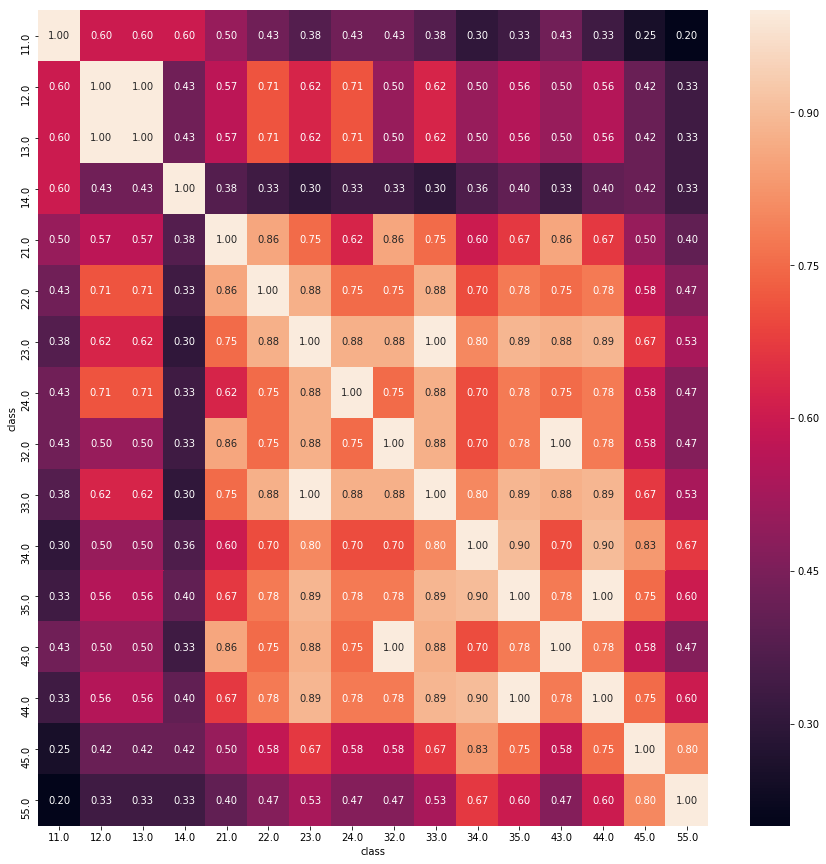

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


plt.figure(figsize=(15,15))
sns.heatmap(jac_sim,annot=True,fmt='.2f');

In [186]:
blackfriday_df

class               11.0  12.0  13.0  14.0  21.0  22.0  23.0  24.0  32.0  \
Product_Category_1                                                         
1                      1     1     1     1     1     1     1     1     1   
2                      0     1     1     0     1     1     1     1     1   
3                      0     0     0     0     1     1     1     1     1   
4                      0     0     0     0     1     1     1     0     1   
5                      1     1     1     1     1     1     1     1     1   
6                      0     1     1     0     0     1     1     1     0   
7                      0     0     0     0     0     0     0     0     0   
8                      1     1     1     1     1     1     1     1     1   
9                      0     0     0     0     0     0     0     0     0   
10                     0     0     0     0     0     0     0     0     0   
11                     0     0     0     0     0     0     1     1     1   
12                     0     0     0     0     0     0     0     0     0   
13                     0     0     0     0     0     0     0     0     0   
14                     0     0     0     0     0     0     0     0     0   
15                     0     0     0     1     0     0     0     0     0   
16                     0     0     0     1     0     0     0     0     0   
17                     0     0     0     0     0     0     0     0     0   
18                     0     0     0     0     0     0     0     0     0   

class               33.0  34.0  35.0  43.0  44.0  45.0  55.0  
Product_Category_1                                            
1                      1     1     1     1     1     1     1  
2                      1     1     1     1     1     1     1  
3                      1     1     1     1     1     1     1  
4                      1     1     1     1     1     1     1  
5                      1     1     1     1     1     1     1  
6                      1     1     1     0     1     1     1  
7                      0     0     0     0     0     0     1  
8                      1     1     1     1     1     1     1  
9                      0     0     0     0     0     0     0  
10                     0     1     0     0     0     1     1  
11                     1     1     1     1     1     1     1  
12                     0     0     0     0     0     0     1  
13                     0     0     0     0     0     1     1  
14                     0     0     0     0     0     0     0  
15                     0     0     0     0     0     1     1  
16                     0     1     1     0     1     1     1  
17                     0     0     0     0     0     0     0  
18                     0     0     0     0     0     0     1

In [187]:
frequent_category = apriori(userclasses.T, min_support=0.2, use_colnames=True)


In [199]:
catrules = association_rules(frequent_category, metric="lift", min_threshold=1).sort_values('lift', ascending = False)
catrules.head(10)

antecedents       consequents  antecedent support  \
18245     (1, 2, 4, 6, 11)     (8, 16, 3, 5)              0.4375   
16468        (11, 3, 4, 6)     (16, 1, 2, 5)              0.4375   
18162  (1, 2, 4, 5, 6, 11)        (8, 16, 3)              0.4375   
17035           (11, 4, 6)  (1, 2, 3, 8, 16)              0.4375   
16475        (11, 4, 5, 6)     (16, 1, 2, 3)              0.4375   
18167  (1, 2, 4, 6, 8, 11)        (16, 3, 5)              0.4375   
8781               (16, 3)     (1, 11, 4, 6)              0.3125   
8769            (11, 4, 6)        (16, 1, 3)              0.4375   
13757           (11, 4, 6)     (8, 1, 2, 16)              0.4375   
17650     (1, 4, 6, 8, 11)        (16, 3, 5)              0.4375   

       consequent support  support  confidence      lift  leverage  conviction  
18245              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
16468              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
18162              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
17035              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
16475              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
18167              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
8781               0.4375   0.3125    1.000000  2.285714  0.175781         inf  
8769               0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
13757              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625  
17650              0.3125   0.3125    0.714286  2.285714  0.175781     2.40625

In [44]:
prodsim = Reduced_DF.groupby(['User_ID','Product_Category_1'])['Purchase'].count().unstack().reset_index().fillna(0).set_index('User_ID')
prodsim.head()

Product_Category_1    1    2     3    4     5    6    7     8    9    10   11  \
User_ID                                                                         
1000001              4.0  1.0  11.0  2.0   2.0  1.0  0.0   8.0  0.0  0.0  0.0   
1000002             31.0  1.0   0.0  0.0  13.0  6.0  0.0  25.0  0.0  0.0  0.0   
1000003             15.0  2.0   1.0  0.0   9.0  0.0  0.0   1.0  0.0  0.0  0.0   
1000004             13.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1000005             18.0  2.0   1.0  3.0  20.0  6.0  5.0  44.0  0.0  0.0  2.0   

Product_Category_1   12   13   14   15   16   17   18  
User_ID                                                
1000001             3.0  0.0  1.0  0.0  1.0  0.0  0.0  
1000002             0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1000003             0.0  0.0  0.0  0.0  0.0  0.0  1.0  
1000004             0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1000005             0.0  0.0  1.0  1.0  3.0  0.0  0.0

In [50]:
from sklearn.metrics import jaccard_similarity_score
jac = []
for i in prodsim.T.columns:
    for j in prodsim.T.columns:
        jac.append(jaccard_similarity_score(prodsim.T[i].tolist(),prodsim.T[j].tolist()))
        
jacc = np.array(jac).reshape(5891,5891)
jsim = pd.DataFrame(jacc,columns=prodsim.T.columns,index=prodsim.T.columns)
jsim

KeyboardInterrupt: 

In [80]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(svdf, metric = "hamming")


In [81]:
# jac_sim = np.triu(jac_sim) to set the lower diagonal to zero
jac_sim = np.tril(jac_sim) 
# to set the upper diagonal to zero
jac_sim


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97074248, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98316312, 0.97377864, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98785537, 0.97736682, 0.98923544, ..., 1.        , 0.        ,
        0.        ],
       [0.97598675, 0.961634  , 0.97405465, ..., 0.98095501, 1.        ,
        0.        ],
       [0.94893734, 0.94010489, 0.94976539, ..., 0.95114546, 0.94093293,
        1.        ]])

In [82]:
# optionally convert it to a DataFrame
jac_sim = pd.DataFrame(jac_sim, index=prodsim.index, columns=prodsim.index)
jac_sim

User_ID   1000001   1000002   1000003   1000004   1000005   1000006   1000007  \
User_ID                                                                         
1000001  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1000002  0.970742  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1000003  0.983163  0.973779  1.000000  0.000000  0.000000  0.000000  0.000000   
1000004  0.988683  0.975987  0.989511  1.000000  0.000000  0.000000  0.000000   
1000005  0.963566  0.953630  0.963290  0.967706  1.000000  0.000000  0.000000   
1000006  0.979023  0.968534  0.980955  0.984267  0.959702  1.000000  0.000000   
1000007  0.986751  0.976815  0.988131  0.992548  0.968534  0.983991  1.000000   
1000008  0.972399  0.963014  0.972675  0.977643  0.955286  0.967982  0.977367   
1000009  0.978195  0.966602  0.977367  0.981783  0.963842  0.973227  0.980955   
1000010  0.934861  0.923820  0.935137  0.936793  0.914988  0.933205  0.935965   
1000011  0.973227  0.966050  0.977919  0.977919  0.955562  0.969914  0.978195   
1000012  0.987579  0.975987  0.989511  0.993376  0.967706  0.984267  0.992548   
1000013  0.976263  0.966878  0.980403  0.981507  0.956942  0.972399  0.980679   
1000014  0.987579  0.977643  0.989511  0.993376  0.968258  0.985923  0.991996   
1000015  0.960254  0.954734  0.965498  0.965498  0.943693  0.958598  0.964670   
1000016  0.984819  0.973227  0.986199  0.990616  0.967154  0.981507  0.989787   
1000017  0.962462  0.954734  0.963290  0.968258  0.947005  0.958046  0.966326   
1000018  0.944521  0.938449  0.945901  0.949765  0.928512  0.942313  0.947833   
1000019  0.954182  0.947005  0.957218  0.961082  0.939829  0.951974  0.957494   
1000020  0.987303  0.977919  0.988683  0.993652  0.968534  0.985095  0.993376   
1000021  0.987579  0.975987  0.988959  0.993376  0.967706  0.984819  0.991996   
1000022  0.949489  0.942865  0.955286  0.955286  0.934585  0.947281  0.956114   
1000023  0.946729  0.938449  0.946453  0.951974  0.931272  0.942865  0.951697   
1000024  0.972399  0.960254  0.974331  0.976539  0.951974  0.970190  0.975711   
1000025  0.979851  0.969914  0.982335  0.985647  0.961634  0.975987  0.984267   
1000026  0.931548  0.924924  0.931824  0.935137  0.911675  0.929892  0.934861   
1000027  0.979851  0.969914  0.983439  0.985095  0.961082  0.978195  0.984819   
1000028  0.977091  0.967706  0.981783  0.982887  0.958322  0.973779  0.980403   
1000029  0.976815  0.967430  0.979851  0.985371  0.958598  0.975159  0.982887   
1000030  0.985095  0.972951  0.985371  0.988683  0.966326  0.980127  0.987855   
...           ...       ...       ...       ...       ...       ...       ...   
1006011  0.967154  0.956666  0.967430  0.971847  0.947833  0.964394  0.971571   
1006012  0.987027  0.975987  0.988407  0.992272  0.967706  0.983163  0.991444   
1006013  0.975159  0.960806  0.973779  0.977091  0.954182  0.970742  0.976815   
1006014  0.978471  0.967982  0.977643  0.982611  0.959150  0.974055  0.980679   
1006015  0.983439  0.971847  0.984819  0.987579  0.965774  0.981231  0.986751   
1006016  0.869445  0.866685  0.868617  0.870825  0.859509  0.865029  0.867789   
1006017  0.986475  0.975987  0.988407  0.992824  0.966602  0.983715  0.991444   
1006018  0.971295  0.964670  0.972123  0.977643  0.954182  0.966326  0.976263   
1006019  0.978471  0.970742  0.981507  0.985923  0.959702  0.975711  0.985095   
1006020  0.984267  0.974883  0.986751  0.991720  0.964946  0.981507  0.989787   
1006021  0.975159  0.964670  0.978747  0.980955  0.956390  0.970742  0.980127   
1006022  0.986199  0.973503  0.987027  0.991996  0.964670  0.981783  0.989511   
1006023  0.972123  0.962186  0.972951  0.977367  0.953354  0.967706  0.976539   
1006024  0.976539  0.967154  0.977919  0.982335  0.960530  0.973227  0.980955   
1006025  0.953630  0.943693  0.955562  0.957770  0.935413  0.951974  0.956390   
1006026  0.979575  0.970742  0.981507  0.985371  0.960806  0.976263  0.983991   
1006027  0.985647  0.975711  0.

In [57]:
prodsim.T

User_ID             1000001  1000002  1000003  1000004  1000005  1000006  \
Product_Category_1                                                         
1                       4.0     31.0     15.0     13.0     18.0      8.0   
2                       1.0      1.0      2.0      0.0      2.0      3.0   
3                      11.0      0.0      1.0      0.0      1.0      5.0   
4                       2.0      0.0      0.0      0.0      3.0      5.0   
5                       2.0     13.0      9.0      0.0     20.0     12.0   
6                       1.0      6.0      0.0      0.0      6.0      1.0   
7                       0.0      0.0      0.0      0.0      5.0      0.0   
8                       8.0     25.0      1.0      0.0     44.0      6.0   
9                       0.0      0.0      0.0      0.0      0.0      0.0   
10                      0.0      0.0      0.0      0.0      0.0      0.0   
11                      0.0      0.0      0.0      0.0      2.0      0.0   
12                      3.0      0.0      0.0      0.0      0.0      3.0   
13                      0.0      0.0      0.0      0.0      0.0      0.0   
14                      1.0      0.0      0.0      0.0      1.0      0.0   
15                      0.0      0.0      0.0      0.0      1.0      0.0   
16                      1.0      0.0      0.0      0.0      3.0      0.0   
17                      0.0      0.0      0.0      0.0      0.0      0.0   
18                      0.0      0.0      1.0      0.0      0.0      3.0   

User_ID             1000007  1000008  1000009  1000010  ...  1006031  1006032  \
Product_Category_1                                      ...                     
1                      14.0     22.0     11.0     46.0  ...      6.0      5.0   
2                       0.0      1.0      0.0     19.0  ...      0.0      3.0   
3                       0.0      1.0      5.0     16.0  ...      1.0      5.0   
4                       0.0      0.0      0.0      7.0  ...      2.0      0.0   
5                       1.0      7.0      9.0     80.0  ...      9.0     14.0   
6                       0.0      3.0      7.0      2.0  ...      0.0      1.0   
7                       0.0      0.0      1.0      1.0  ...      0.0      1.0   
8                       0.0     42.0     21.0     40.0  ...      6.0     13.0   
9                       0.0      0.0      0.0      0.0  ...      0.0      0.0   
10                      0.0      0.0      0.0      0.0  ...      1.0      1.0   
11                      1.0      0.0      0.0      1.0  ...      0.0      4.0   
12                      0.0      0.0      0.0      6.0  ...      2.0      2.0   
13                      0.0      0.0      0.0      1.0  ...      0.0      0.0   
14                      0.0      0.0      0.0      2.0  ...      1.0      0.0   
15                      0.0      0.0      1.0      0.0  ...      0.0      1.0   
16                      0.0      0.0      2.0      0.0  ...      1.0      0.0   
17                      0.0      0.0      0.0      1.0  ...      0.0      0.0   
18                      0.0      0.0      0.0      0.0  ...      1.0      1.0   

User_ID             1006033  1006034  1006035  1006036  1006037  1006038  \
Product_Category_1                                                         
1                      27.0      0.0     34.0     81.0     14.0      0.0   
2                       1.0      0.0      4.0     14.0      2.0      0.0   
3                       0.0      0.0      1.0     12.0      0.0      2.0   
4                       1.0      0.0      8.0     13.0      1.0      0.0   
5                       0.0      0.0     48.0    119.0     24.0      4.0   
6                       1.0      4.0      3.0     20.0      6.0      0.0   
7                       0.0      0.0      0.0      6.0      0.0      0.0   
8                       3.0      1.0     39.0    151.0     43.0      4.0   
9                       0.0      0.0      0.0      0.0      0.0      0.0   
10                    

In [10]:
prodsim.shape

(5891, 18)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(prodsim,prodsim)
cosdf = pd.DataFrame(cos,index=Reduced_DF['User_ID'].unique(),columns=Reduced_DF['User_ID'].unique())
cosdf

1000001   1000002   1000003   1000004   1000005   1000006   1000007  \
1000001  1.000000  0.566008  0.375566  0.268462  0.630963  0.680718  0.276643   
1000002  0.566008  1.000000  0.813160  0.732306  0.881117  0.741159  0.750423   
1000003  0.375566  0.813160  1.000000  0.847850  0.537851  0.781181  0.879710   
1000004  0.268462  0.732306  0.847850  1.000000  0.343247  0.445823  0.994937   
1000005  0.630963  0.881117  0.537851  0.343247  1.000000  0.722628  0.371323   
1000006  0.680718  0.741159  0.781181  0.445823  0.722628  1.000000  0.491090   
1000007  0.276643  0.750423  0.879710  0.994937  0.371323  0.491090  1.000000   
1000008  0.632854  0.905738  0.515328  0.457936  0.954621  0.606675  0.465972   
1000009  0.733841  0.900504  0.571778  0.409094  0.965212  0.733679  0.430810   
1000010  0.577208  0.793802  0.816886  0.442022  0.784999  0.942476  0.495098   
1000011  0.400437  0.636377  0.643822  0.180799  0.732885  0.837711  0.245964   
1000012  0.373892  0.776435  0.881674  0.557086  0.658639  0.848569  0.607052   
1000013  0.311510  0.696231  0.797244  0.850923  0.393369  0.511562  0.850279   
1000014  0.562927  0.969056  0.784395  0.609994  0.916031  0.790352  0.639418   
1000015  0.558345  0.941373  0.818697  0.575656  0.898370  0.850638  0.616290   
1000016  0.345566  0.721930  0.873085  0.498273  0.636613  0.860798  0.560670   
1000017  0.532721  0.920558  0.844792  0.781071  0.747942  0.723495  0.808620   
1000018  0.595282  0.873531  0.899159  0.893570  0.612377  0.738343  0.902373   
1000019  0.569253  0.814962  0.894130  0.807080  0.595749  0.744980  0.852007   
1000021  0.279108  0.755498  0.889867  0.990148  0.379516  0.507645  0.992171   
1000022  0.744026  0.499632  0.643093  0.583460  0.297624  0.617784  0.590872   
1000023  0.361910  0.774590  0.943561  0.642491  0.613466  0.849081  0.697128   
1000024  0.462155  0.853245  0.934440  0.746331  0.661115  0.823980  0.789587   
1000025  0.450471  0.797153  0.817826  0.441264  0.779899  0.883971  0.498448   
1000026  0.423020  0.832325  0.942235  0.964371  0.501123  0.642988  0.974174   
1000027  0.474595  0.746447  0.762880  0.352307  0.774037  0.899393  0.412521   
1000028  0.497949  0.682142  0.642619  0.213504  0.767452  0.847741  0.273115   
1000029  0.602555  0.852822  0.662277  0.342376  0.933627  0.847994  0.389306   
1000030  0.281063  0.744253  0.849931  0.998115  0.363288  0.455865  0.994603   
1000031  0.608635  0.798620  0.533082  0.217643  0.954566  0.792413  0.262942   
...           ...       ...       ...       ...       ...       ...       ...   
1002640  0.568762  0.939380  0.875916  0.875286  0.723405  0.718364  0.890646   
1003181  0.666486  0.951976  0.691836  0.692820  0.871963  0.649924  0.697518   
1003330  0.794039  0.820194  0.570946  0.308901  0.934824  0.829733  0.346852   
1003803  0.726096  0.737763  0.559582  0.255155  0.861214  0.861686  0.297383   
1004100  0.461761  0.351194  0.530299  0.048113  0.423871  0.785593  0.112834   
1004385  0.570335  0.841335  0.684254  0.337833  0.923386  0.874718  0.384756   
1004527  0.590018  0.957227  0.729823  0.549442  0.945590  0.780790  0.575946   
1004612  0.458027  0.881263  0.886734  0.957088  0.585221  0.609890  0.962592   
1004955  0.339056  0.807236  0.938221  0.938194  0.482360  0.631424  0.948830   
1005007  0.283306  0.733621  0.848713  0.964836  0.361075  0.483914  0.964237   
1005110  0.476116  0.814146  0.958236  0.921658  0.508620  0.728407  0.938825   
1005160  0.347106  0.736571  0.872740  0.524672  0.643185  0.860457  0.585936   
1005295  0.329606  0.793682  0.854778  0.982205  0.428204  0.497344  0.980842   
1005309  0.412519  0.884613  0.955390  0.939032  0.585493  0.681879  0.954500   
1005320  0.375222  0.599955  0.620419  0.205037  0.677197  0.780797  0.291428   
1005409  0.492895  0.919344  0.857481  0.750479  0.781998  0.752806  0.784775   
1005608  0.386698  0.809748  0.985251  0.802257  0.563261  0.792552  0.844843   
1006038  0.341223  0.805632  0.851940  0.

In [16]:
cosdf[cosdf[:]>0.70]

1000001   1000002   1000003   1000004   1000005   1000006   1000007  \
1000001  1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
1000002       NaN  1.000000  0.813160  0.732306  0.881117  0.741159  0.750423   
1000003       NaN  0.813160  1.000000  0.847850       NaN  0.781181  0.879710   
1000004       NaN  0.732306  0.847850  1.000000       NaN       NaN  0.994937   
1000005       NaN  0.881117       NaN       NaN  1.000000  0.722628       NaN   
1000006       NaN  0.741159  0.781181       NaN  0.722628  1.000000       NaN   
1000007       NaN  0.750423  0.879710  0.994937       NaN       NaN  1.000000   
1000008       NaN  0.905738       NaN       NaN  0.954621       NaN       NaN   
1000009  0.733841  0.900504       NaN       NaN  0.965212  0.733679       NaN   
1000010       NaN  0.793802  0.816886       NaN  0.784999  0.942476       NaN   
1000011       NaN       NaN       NaN       NaN  0.732885  0.837711       NaN   
1000012       NaN  0.776435  0.881674       NaN       NaN  0.848569       NaN   
1000013       NaN       NaN  0.797244  0.850923       NaN       NaN  0.850279   
1000014       NaN  0.969056  0.784395       NaN  0.916031  0.790352       NaN   
1000015       NaN  0.941373  0.818697       NaN  0.898370  0.850638       NaN   
1000016       NaN  0.721930  0.873085       NaN       NaN  0.860798       NaN   
1000017       NaN  0.920558  0.844792  0.781071  0.747942  0.723495  0.808620   
1000018       NaN  0.873531  0.899159  0.893570       NaN  0.738343  0.902373   
1000019       NaN  0.814962  0.894130  0.807080       NaN  0.744980  0.852007   
1000021       NaN  0.755498  0.889867  0.990148       NaN       NaN  0.992171   
1000022  0.744026       NaN       NaN       NaN       NaN       NaN       NaN   
1000023       NaN  0.774590  0.943561       NaN       NaN  0.849081       NaN   
1000024       NaN  0.853245  0.934440  0.746331       NaN  0.823980  0.789587   
1000025       NaN  0.797153  0.817826       NaN  0.779899  0.883971       NaN   
1000026       NaN  0.832325  0.942235  0.964371       NaN       NaN  0.974174   
1000027       NaN  0.746447  0.762880       NaN  0.774037  0.899393       NaN   
1000028       NaN       NaN       NaN       NaN  0.767452  0.847741       NaN   
1000029       NaN  0.852822       NaN       NaN  0.933627  0.847994       NaN   
1000030       NaN  0.744253  0.849931  0.998115       NaN       NaN  0.994603   
1000031       NaN  0.798620       NaN       NaN  0.954566  0.792413       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
1002640       NaN  0.939380  0.875916  0.875286  0.723405  0.718364  0.890646   
1003181       NaN  0.951976       NaN       NaN  0.871963       NaN       NaN   
1003330  0.794039  0.820194       NaN       NaN  0.934824  0.829733       NaN   
1003803  0.726096  0.737763       NaN       NaN  0.861214  0.861686       NaN   
1004100       NaN       NaN       NaN       NaN       NaN  0.785593       NaN   
1004385       NaN  0.841335       NaN       NaN  0.923386  0.874718       NaN   
1004527       NaN  0.957227  0.729823       NaN  0.945590  0.780790       NaN   
1004612       NaN  0.881263  0.886734  0.957088       NaN       NaN  0.962592   
1004955       NaN  0.807236  0.938221  0.938194       NaN       NaN  0.948830   
1005007       NaN  0.733621  0.848713  0.964836       NaN       NaN  0.964237   
1005110       NaN  0.814146  0.958236  0.921658       NaN  0.728407  0.938825   
1005160       NaN  0.736571  0.872740       NaN       NaN  0.860457       NaN   
1005295       NaN  0.793682  0.854778  0.982205       NaN       NaN  0.980842   
1005309       NaN  0.884613  0.955390  0.939032       NaN       NaN  0.954500   
1005320       NaN       NaN       NaN       NaN       NaN  0.780797       NaN   
1005409       NaN  0.919344  0.857481  0.750479  0.781998  0.752806  0.784775   
1005608       NaN  0.809748  0.985251  0.802257       NaN  0.792552  0.844843   
1006038       NaN  0.805632  0.851940  0.

In [7]:
blackfriday_df[blackfriday_df['User_ID']==1000005]

User_ID Product_ID Gender    Age  Occupation City_Category  \
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20             A   
13      1000005  P00145042      M  26-35          20             A   
39189   1000005  P00189042      M  26-35          20             A   
39190   1000005  P00328242      M  26-35          20             A   
39191   1000005  P00159442      M  26-35          20             A   
78152   1000005  P00029142      M  26-35          20             A   
78153   1000005  P00183442      M  26-35          20             A   
78154   1000005  P00214542      M  26-35          20             A   
78155   1000005  P00031042      M  26-35          20             A   
78156   1000005  P00162242      M  26-35          20             A   
78157   1000005  P00294842      M  26-35          20             A   
78158   1000005  P00021042      M  26-35          20             A   
78159   1000005  P00140742      M  26-35          20             A   
116858  1000005  P00355142      M  26-35          20             A   
116859  1000005  P00080542      M  26-35          20             A   
116860  1000005  P00025942      M  26-35          20             A   
116861  1000005  P00135742      M  26-35          20             A   
116862  1000005  P00324442      M  26-35          20             A   
116863  1000005  P00036842      M  26-35          20             A   
116864  1000005  P00289042      M  26-35          20             A   
155581  1000005  P00251342      M  26-35          20             A   
155582  1000005  P00265242      M  26-35          20             A   
155583  1000005  P00248142      M  26-35          20             A   
155584  1000005  P00338542      M  26-35          20             A   
155585  1000005  P00110442      M  26-35          20             A   
155586  1000005  P00056842      M  26-35          20             A   
155587  1000005  P00151442      M  26-35          20             A   
...         ...        ...    ...    ...         ...           ...   
428913  1000005  P00075542      M  26-35          20             A   
428914  1000005  P00151342      M  26-35          20             A   
428915  1000005  P00304442      M  26-35          20             A   
428916  1000005  P00003242      M  26-35          20             A   
428917  1000005  P00303742      M  26-35          20             A   
428918  1000005  P00001642      M  26-35          20             A   
428919  1000005  P00048442      M  26-35          20             A   
428920  1000005  P00034842      M  26-35          20             A   
428921  1000005  P00302642      M  26-35          20             A   
428922  1000005  P00304342      M  26-35          20             A   
467673  1000005  P00270242      M  26-35          20             A   
467674  1000005  P00280442      M  26-35          20             A   
467675  1000005  P00220342      M  26-35          20             A   
467676  1000005  P00249642      M  26-35          20             A   
467677  1000005  P00147942      M  26-35          20             A   
467678  1000005  P00129442      M  26-35          20             A   
467679  1000005  P00219242      M  26-35          20             A   
467680  1000005  P00274542      M  26-35          20             A   
467681  1000005  P00028042      M  26-35          20             A   
506609  1000005  P00200842      M  26-35          20             A   
506610  1000005  P00317942      M  26-35          20             A   
506611  1000005  P00255842      M  26-35          20             A   
506612  1000005  P00115242      M  26-35          20             A   
506613  1000005  P00157342      M  26-35          20             A   
506614  1000005  P00158342      M  26-35          20             A   
506615  1000005  P

In [19]:
#SVD 

In [79]:
svdf = Reduced_DF.groupby(['User_ID','Product_ID'])['Purchase'].count().unstack().reset_index().fillna(0).set_index('User_ID')
svdf.head()

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
User_ID                                                                        
1000001           1.0        0.0        0.0        0.0        0.0        0.0   
1000002           0.0        0.0        0.0        0.0        0.0        0.0   
1000003           0.0        0.0        0.0        0.0        0.0        0.0   
1000004           0.0        0.0        0.0        0.0        0.0        0.0   
1000005           0.0        0.0        0.0        0.0        0.0        0.0   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098942  \
User_ID                                                 ...             
1000001           0.0        0.0        0.0        0.0  ...       0.0   
1000002           0.0        0.0        0.0        0.0  ...       0.0   
1000003           0.0        0.0        0.0        0.0  ...       0.0   
1000004           0.0        0.0        0.0        0.0  ...       0.0   
1000005           0.0        0.0        0.0        0.0  ...       0.0   

Product_ID  P0099042  P0099142  P0099242  P0099342  P0099442  P0099642  \
User_ID                                                                  
1000001          0.0       0.0       0.0       0.0       0.0       0.0   
1000002          0.0       0.0       0.0       0.0       0.0       0.0   
1000003          0.0       0.0       0.0       0.0       0.0       0.0   
1000004          0.0       0.0       0.0       0.0       0.0       0.0   
1000005          0.0       0.0       0.0       0.0       0.0       0.0   

Product_ID  P0099742  P0099842  P0099942  
User_ID                                   
1000001          0.0       0.0       0.0  
1000002          0.0       0.0       0.0  
1000003          0.0       0.0       0.0  
1000004          0.0       0.0       0.0  
1000005          0.0       0.0       0.0  

[5 rows x 3623 columns]

In [86]:
# coocc.isnull().sum()

In [18]:
R = coocc.as_matrix()
user_mean = np.mean(R, axis = 1)
R_demeaned = R - user_mean.reshape(-1, 1)

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [81]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R, k = 10)

In [83]:
sigma = np.diag(sigma)
sigma
# Vt


array([ 2030.1398566 ,  2143.09177942,  2397.66007733,  2947.71703951,
        3346.00085055,  4044.0356243 ,  5519.97471106,  6711.14202358,
        8599.00756795, 75590.18189538])

In [35]:
user_mean

array([48.04692244, 22.08004416, 14.4537676 , ...,  7.50565829,
        5.41650566,  1.03063759])

In [30]:
all_user_predicted = np.dot(np.dot(U, sigma), Vt) + user_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted, columns = recommvector.index)
all_user_predicted

array([[271.75155661, 142.06914241,  82.35601558, ...,  58.2195568 ,
         29.51297514,   4.16488036],
       [142.05416124,  93.23281453,  43.22672541, ...,  31.92919466,
          8.62736643,   0.65498642],
       [ 82.40798817,  43.23037282,  41.29883331, ...,  17.51321683,
          7.37889052,   1.27932359],
       ...,
       [ 58.14147352,  31.88419669,  17.50602738, ...,  19.91698141,
          4.23585825,   0.30229892],
       [ 29.54855138,   8.60502973,   7.35761437, ...,   4.26233882,
         11.50478819,   2.54586187],
       [  4.181358  ,   0.59353826,   1.25367447, ...,   0.34366778,
          2.52915284,   1.2640325 ]])

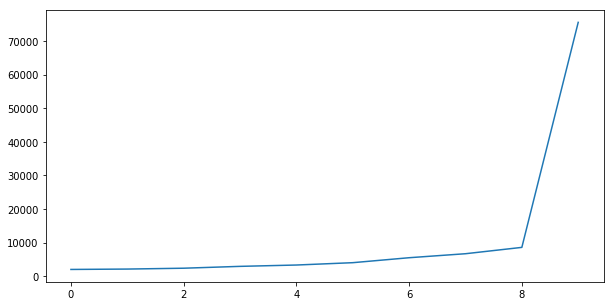

In [84]:
# preds_df
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(sigma[:40])
plt.show()

In [28]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

#     print 'User {0} has already rated {1} movies.'format
    print(userID, user_full.shape[0])
#     print 'Recommending the highest {0} predicted ratings movies not already rated.'.format
    print(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~proddf['Product_ID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'MovieID',
               right_on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_movies(preds_df, 1000006, recommvector, a, 10)

IndexError: single positional indexer is out-of-bounds

In [34]:
proddf = blackfriday_df[['Product_ID','Product_Category_1']]
userdf = blackfriday_df[['User_ID','Product_ID']]
userdf

User_ID Product_ID
0       1000001  P00069042
1       1000001  P00248942
2       1000001  P00087842
3       1000001  P00085442
4       1000002  P00285442
5       1000003  P00193542
6       1000004  P00184942
7       1000004  P00346142
8       1000004   P0097242
9       1000005  P00274942
10      1000005  P00251242
11      1000005  P00014542
12      1000005  P00031342
13      1000005  P00145042
14      1000006  P00231342
15      1000006  P00190242
16      1000006   P0096642
17      1000006  P00058442
18      1000007  P00036842
19      1000008  P00249542
20      1000008  P00220442
21      1000008  P00156442
22      1000008  P00213742
23      1000008  P00214442
24      1000008  P00303442
25      1000009  P00135742
26      1000009  P00039942
27      1000009  P00161442
28      1000009  P00078742
29      1000010  P00085942
...         ...        ...
537547  1004733  P00244042
537548  1004734  P00111042
537549  1004734  P00345842
537550  1004735  P00278242
537551  1004735  P00313442
537552  1004735   P0098642
537553  1004735  P00119342
537554  1004735  P00114042
537555  1004735  P00135142
537556  1004736  P00194542
537557  1004736  P00175242
537558  1004736  P00101942
537559  1004736  P00109142
537560  1004736  P00084842
537561  1004736  P00078142
537562  1004736  P00146742
537563  1004736  P00154642
537564  1004736  P00117442
537565  1004736  P00051142
537566  1004736  P00048742
537567  1004736  P00157542
537568  1004736  P00250642
537569  1004736  P00023142
537570  1004736  P00162442
537571  1004737  P00221442
537572  1004737  P00193542
537573  1004737  P00111142
537574  1004737  P00345942
537575  1004737  P00285842
537576  1004737  P00118242

[537577 rows x 2 columns]

In [48]:
for i in prodsim.columns:
    prodsim[i] = np.where(prodsim[i]>0,1,0)
    

In [86]:
rfm.drop(index = [5891,5892],inplace=True)
rfm.shape

(5891, 9)

In [38]:
prodsim['class'] = rfm['RFMSCORE along Table (Down)'].reset_index(drop=True).values


In [41]:
userclasses1 = pd.pivot_table(prodsim,index='class',aggfunc=pd.Series.mode)
userclasses1 = userclasses1.T

In [43]:
from sklearn.metrics import jaccard_similarity_score
prodjac = []
for i in userclasses1.columns:
    for j in userclasses1.columns:
        prodjac.append(jaccard_similarity_score(userclasses1[i].tolist(),userclasses1[j].tolist()))
        
prodjacc = np.array(prodjac).reshape(16,16)
prodjsim = pd.DataFrame(prodjacc,columns=userclasses1.columns,index=userclasses1.columns)
prodjsim

class      11.0      12.0      13.0      14.0      21.0      22.0      23.0  \
class                                                                         
11.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
12.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
13.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
14.0   0.989511  0.989511  0.989511  1.000000  0.989235  0.989511  0.989511   
21.0   0.999724  0.999724  0.999724  0.989235  1.000000  0.999724  0.999724   
22.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
23.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
24.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
32.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
33.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
34.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
35.0   0.999724  0.999724  0.999724  0.989235  0.999448  0.999724  0.999724   
43.0   0.997792  0.997792  0.997792  0.987303  0.997516  0.997792  0.997792   
44.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
45.0   1.000000  1.000000  1.000000  0.989511  0.999724  1.000000  1.000000   
55.0   0.999448  0.999448  0.999448  0.988959  0.999172  0.999448  0.999448   

class      24.0      32.0      33.0      34.0      35.0      43.0      44.0  \
class                                                                         
11.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
12.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
13.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
14.0   0.989511  0.989511  0.989511  0.989511  0.989235  0.987303  0.989511   
21.0   0.999724  0.999724  0.999724  0.999724  0.999448  0.997516  0.999724   
22.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
23.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
24.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
32.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
33.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
34.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
35.0   0.999724  0.999724  0.999724  0.999724  1.000000  0.997516  0.999724   
43.0   0.997792  0.997792  0.997792  0.997792  0.997516  1.000000  0.997792   
44.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
45.0   1.000000  1.000000  1.000000  1.000000  0.999724  0.997792  1.000000   
55.0   0.999448  0.999448  0.999448  0.999448  0.999724  0.997240  0.999448   

class      45.0      55.0  
class                      
11.0   1.000000  0.999448  
12.0   1.000000  0.999448  
13.0   1.000000  0.999448  
14.0   0.989511  0.988959  
21.0   0.999724  0.999172  
22.0   1.000000  0.999448  
23.0   1.000000  0.999448  
24.0   1.000000  0.999448  
32.0   1.000000  0.999448  
33.0   1.000000  0.999448  
34.0   1.000000  0.999448  
35.0   0.999724  0.999724  
43.0   0.997792  0.997240  
44.0   1.000000  0.999448  
45.0   1.000000  0.999448  
55.0   0.999448  1.000000

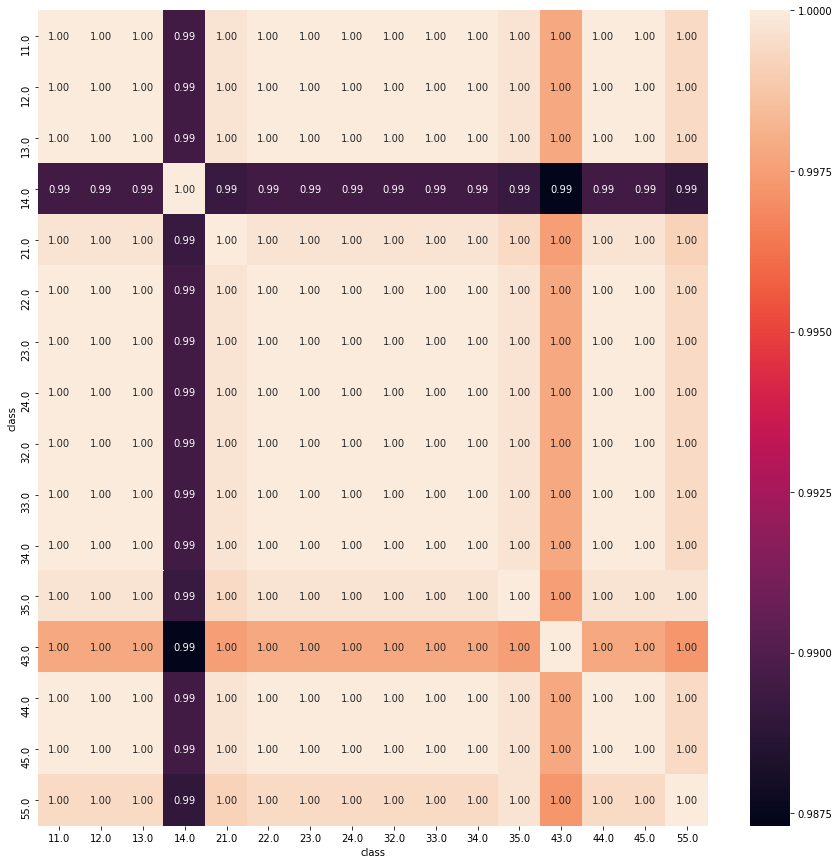

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


plt.figure(figsize=(15,15))
sns.heatmap(prodjsim,annot=True,fmt='.2f');

In [54]:
#Cleaning for apriori
Basket_DF = Reduced_DF.groupby(['User_ID','Product_ID'])['Purchase'].sum().unstack().reset_index().fillna(0).set_index('User_ID')

In [7]:
Basket_DF.head()

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
User_ID                                                                        
1000001       13650.0        0.0        0.0        0.0        0.0        0.0   
1000002           0.0        0.0        0.0        0.0        0.0        0.0   
1000003           0.0        0.0        0.0        0.0        0.0        0.0   
1000004           0.0        0.0        0.0        0.0        0.0        0.0   
1000005           0.0        0.0        0.0        0.0        0.0        0.0   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098942  \
User_ID                                                 ...             
1000001           0.0        0.0        0.0        0.0  ...       0.0   
1000002           0.0        0.0        0.0        0.0  ...       0.0   
1000003           0.0        0.0        0.0        0.0  ...       0.0   
1000004           0.0        0.0        0.0        0.0  ...       0.0   
1000005           0.0        0.0        0.0        0.0  ...       0.0   

Product_ID  P0099042  P0099142  P0099242  P0099342  P0099442  P0099642  \
User_ID                                                                  
1000001          0.0       0.0       0.0       0.0       0.0       0.0   
1000002          0.0       0.0       0.0       0.0       0.0       0.0   
1000003          0.0       0.0       0.0       0.0       0.0       0.0   
1000004          0.0       0.0       0.0       0.0       0.0       0.0   
1000005          0.0       0.0       0.0       0.0       0.0       0.0   

Product_ID  P0099742  P0099842  P0099942  
User_ID                                   
1000001          0.0       0.0       0.0  
1000002          0.0       0.0       0.0  
1000003          0.0       0.0       0.0  
1000004          0.0       0.0       0.0  
1000005          0.0       0.0       0.0  

[5 rows x 3623 columns]

In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [9]:
Basket = Basket_DF.applymap(encode_units)

In [52]:
frequent_itemsets = apriori(Basket, min_support=0.05, use_colnames=True)
frequent_itemsets.to_excel('animeshrules.xlsx')

In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending = False)
rules.head()

antecedents  consequents  antecedent support  consequent support  \
2287  (P00120042)  (P00193542)            0.151417            0.102869   
2286  (P00193542)  (P00120042)            0.102869            0.151417   
2607  (P00250242)  (P00248142)            0.128841            0.137328   
2606  (P00248142)  (P00250242)            0.137328            0.128841   
1161  (P00120042)  (P00057942)            0.151417            0.131387   

       support  confidence      lift  leverage  conviction  
2287  0.051095    0.337444  3.280334  0.035519    1.354046  
2286  0.051095    0.496700  3.280334  0.035519    1.686036  
2607  0.051265    0.397892  2.897381  0.033571    1.432753  
2606  0.051265    0.373300  2.897381  0.033571    1.390075  
1161  0.053981    0.356502  2.713378  0.034086    1.349831

In [64]:
rules.to_excel('anirules.xlsx')

In [12]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('support', ascending = False).head(10)

antecedents  consequents  antecedent support  consequent support  \
349   (P00025442)  (P00110742)            0.269224            0.270073   
348   (P00110742)  (P00025442)            0.270073            0.269224   
1656  (P00112142)  (P00110742)            0.261246            0.270073   
1657  (P00110742)  (P00112142)            0.270073            0.261246   
359   (P00025442)  (P00112142)            0.269224            0.261246   
358   (P00112142)  (P00025442)            0.261246            0.269224   
2671  (P00265242)  (P00278642)            0.315396            0.205907   
2670  (P00278642)  (P00265242)            0.205907            0.315396   
1094  (P00237542)  (P00057642)            0.233237            0.242743   
1095  (P00057642)  (P00237542)            0.242743            0.233237   

       support  confidence      lift  leverage  conviction  
349   0.117637    0.436948  1.617890  0.044927    1.296377  
348   0.117637    0.435575  1.617890  0.044927    1.294726  
1656  0.109998    0.421053  1.559033  0.039443    1.260783  
1657  0.109998    0.407291  1.559033  0.039443    1.246403  
359   0.103887    0.385876  1.477062  0.033554    1.202940  
358   0.103887    0.397661  1.477062  0.033554    1.213230  
2671  0.100492    0.318622  1.547406  0.035550    1.165422  
2670  0.100492    0.488046  1.547406  0.035550    1.337237  
1094  0.100153    0.429403  1.768961  0.043536    1.327131  
1095  0.100153    0.412587  1.768961  0.043536    1.305322

In [106]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4).sort_values('confidence', ascending = False).to_csv("Confidence.csv")

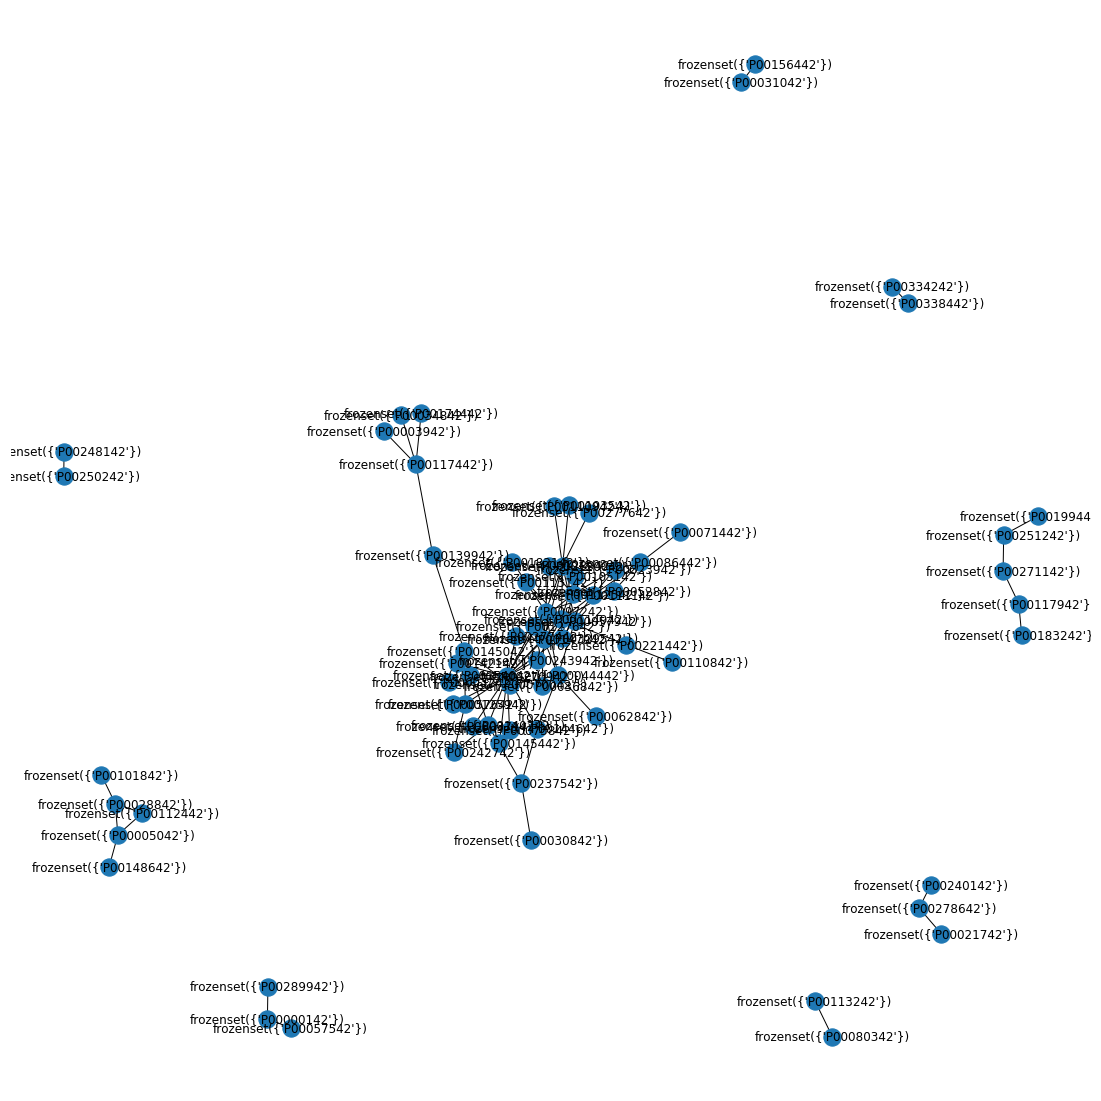

In [65]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':rules['antecedents'][:200], 'to':rules['consequents'][:200]})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
plt.figure(figsize=(15,15))
nx.draw(G, with_labels=True)

plt.show()


In [58]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show): 
        G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
           pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

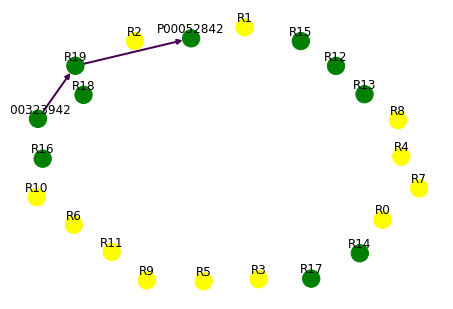

In [61]:
draw_graph(rules,20)

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a list of word
text=str(list(Product_Support_DF.sort_values('Support', ascending = False).head(20)['Product_ID']))
wordcloud = WordCloud(width=2400, relative_scaling=Product_Support_DF['Support'],height=1440, max_font_size=50, min_font_size=20,background_color='black').generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


C:\Users\Shyam Sundar\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
str(list(blackfriday_df['Product_ID'].values))

"['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', 'P00193542', 'P00184942', 'P00346142', 'P0097242', 'P00274942', 'P00251242', 'P00014542', 'P00031342', 'P00145042', 'P00231342', 'P00190242', 'P0096642', 'P00058442', 'P00036842', 'P00249542', 'P00220442', 'P00156442', 'P00213742', 'P00214442', 'P00303442', 'P00135742', 'P00039942', 'P00161442', 'P00078742', 'P00085942', 'P00118742', 'P00297942', 'P00266842', 'P00058342', 'P00032442', 'P00105942', 'P00182642', 'P00186942', 'P00155442', 'P00221342', 'P00087242', 'P00111142', 'P00259342', 'P0094542', 'P00148642', 'P00312142', 'P00113242', 'P00192642', 'P00110842', 'P00189642', 'P00304242', 'P00365242', 'P00129542', 'P00140742', 'P00182342', 'P00276642', 'P00334242', 'P00247542', 'P00338442', 'P00275142', 'P00333042', 'P00166242', 'P00161942', 'P00348242', 'P00042142', 'P00244242', 'P00217742', 'P00019342', 'P00100642', 'P00073842', 'P00366542', 'P00190742', 'P00151842', 'P00112642', 'P00118442', 'P00034442', 'P00222242', 

In [7]:
Reduced_DF['Product_ID'].nunique()

3623

In [8]:
Reduced_DF.loc[:,['User_ID', 
                  'Occupation', 
                  'Product_Category_1']] = Reduced_DF.loc[:,['User_ID', 
                                                             'Occupation', 
                                                             'Product_Category_1']].apply(lambda x: x.astype(object))

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyError: "['Product_Category_1'] not in index"

In [ ]:
Reduced_DF.info()

## The story

#### Q1: how many unique user_id, product_id, Age_group, occumpation and product categories are there

In [86]:
def Create_Unique_DF(df):
    col_name = []
    unique_record  = []
    data_type = []
    for c in df.columns:
        col_name.append(c)
        unique_record.append(df[c].nunique())
        data_type.append(df[c].dtype)
    return(pd.DataFrame( {"Colname" : col_name, 
                          "Unique_Records" : unique_record, 
                          "DataType" : data_type} ))

In [91]:
Create_Unique_DF(Reduced_DF.drop('Purchase', axis=1)).set_index('Colname').T

Colname        User_ID Product_ID  Gender     Age Occupation City_Category  \
Unique_Records    5891       3623       2       7         21             3   
DataType        object     object  object  object     object        object   

Colname        Product_Category_1  
Unique_Records                 18  
DataType                   object

In [75]:
Reduced_DF.drop('Purchase', axis=1).describe()

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    537577     537577  537577  537577      537577        537577   
unique     5891       3623       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1025       1858  405380  214690       70862        226493   

        Product_Category_1  
count               537577  
unique                  18  
top                      5  
freq                148592

##### Q2: For each product_category_1 find
1. Number of transactions
2. Maximum purchase
3. Minium Purchase
4. Average purchase
5. Total purchase

Tell inference

In [190]:
Reduced_DF.groupby('Product_Category_1').\
agg(['count', 'min', 'max', 'mean', 'sum'])['Purchase'].reset_index().apply(lambda x: round(x,0)).\
sort_values('mean', ascending = False).to_excel('catmean.xlsx')

Product 10, 7, 6 and 9 are having highest average purchases

##### Q2: For each Product find
1. Number of transactions
2. Maximum purchase
3. Minium Purchase
4. Average purchase
5. Total purchase

Tell inference

In [454]:
list(tempval.index)

['P00000142',
 'P00000642',
 'P00001042',
 'P00001142',
 'P00002142',
 'P00002542',
 'P00003242',
 'P00003442',
 'P00003942',
 'P00004742',
 'P00005042',
 'P00006942',
 'P00010742',
 'P00010842',
 'P00014542',
 'P00016042',
 'P00019142',
 'P00021742',
 'P00022942',
 'P00024742',
 'P00025442',
 'P00028842',
 'P00030842',
 'P00031042',
 'P00032042',
 'P00033042',
 'P00034042',
 'P00034742',
 'P00034842',
 'P00035542',
 'P00035842',
 'P00035942',
 'P00036842',
 'P00037142',
 'P00042742',
 'P00044442',
 'P00046142',
 'P00046742',
 'P00051442',
 'P00052642',
 'P00052842',
 'P00053842',
 'P00057442',
 'P00057542',
 'P00057642',
 'P00057742',
 'P00057942',
 'P00058042',
 'P00058142',
 'P00058242',
 'P00058442',
 'P00059442',
 'P00059642',
 'P00062842',
 'P00070042',
 'P00070342',
 'P00071442',
 'P00073842',
 'P00074642',
 'P00080342',
 'P00083942',
 'P00084342',
 'P00084442',
 'P00084842',
 'P00085042',
 'P00085242',
 'P00085342',
 'P00085942',
 'P00086042',
 'P00086342',
 'P00086442',
 'P000

# Value of top 100 products 

In [120]:
amt = Reduced_DF.groupby('Product_ID').\
agg(['count', 'min', 'max', 'mean', 'sum'])['Purchase'].reset_index().sort_values('mean', ascending = False)
amt = amt.set_index('Product_ID')
# amt

In [122]:
amt = amt.loc[tempval.index].sort_values('mean',ascending=False)
amt

count   min    max          mean       sum
P00052842    968  5210  23961  20136.811983  19492434
P00071442    725  4197  21569  18938.128276  13730143
P00005042    955  4358  20690  18310.929843  17486938
P00255842   1354  4056  20971  18207.121123  24652442
P00028842   1172  4097  20690  17606.353242  20634646
P00080342   1186  3822  19708  17574.165261  20842960
P00110942   1336  4365  19708  17389.624251  23232538
P00025442   1586  3961  19707  17359.663304  27532426
P00059442   1384  3987  20690  17303.684249  23948299
P00148642   1179  4155  20690  17287.489398  20381950
P00112442    906  4012  20690  17254.045254  15632165
P00184942   1424  3809  19707  16896.679073  24060871
P00113242    921  3796  19708  16823.560261  15494499
P00237542   1374  3796  19708  16809.670306  23096487
P00004742    591  3997  20686  16715.184433   9878674
P00110842   1260  3902  19708  16684.923810  21023004
P00110742   1591  3798  19708  16582.381521  26382569
P00010742   1331  3804  19708  16427.529677  21865042
P00114942   1162  3863  19708  16301.592083  18942450
P00111142   1004  3796  19706  16075.939243  16140243
P00112542   1113  3795  19704  16035.511231  17847524
P00120042    892  3911  19707  15980.043722  14254199
P00334242   1082  3829  19704  15924.661738  17230484
P0097242     896  3936  19708  15903.876116  14249873
P00044442   1099  4075  19708  15870.345769  17441510
P00128942    926  3933  19708  15770.710583  14603678
P00147942    894  3864  19707  15735.919463  14067912
P00057642   1430  3890  19708  15729.853147  22493690
P00112142   1539  3793  19706  15518.274204  23882624
P00182142    891  4014  19708  15241.169473  13579882
...          ...   ...    ...           ...       ...
P00271142    781  1735   8904   7210.391805   5631316
P00121642    841  1752   8906   7183.082045   6040972
P00210042    775  1970  10082   7171.098065   5557601
P00157542    823  1950  10082   7074.421628   5822249
P00129642    763  1716   8907   7023.338139   5358807
P00258742    955  1725   8907   6998.556021   6683621
P00021742    762  1714   8907   6984.363517   5322085
P00100842    705  1732   8906   6981.068085   4921653
P00117942   1346  1721   8907   6980.994056   9396418
P00117442   1227  1721   8907   6961.405053   8541644
P00174442    714  1715   8905   6937.714286   4953528
P00161942    792  1739   8906   6909.047980   5471966
P00240142    802  1760   8906   6905.293017   5538045
P00251242   1167  1713   8906   6862.372751   8008389
P00324942    775  1741   8907   6811.744516   5279102
P00178942    824  1718   8906   6795.263350   5599297
P00259342    814  1739   8907   6747.119165   5492155
P00034842    670  1720   8905   6623.801493   4437947
P00139942    655  1725   8906   6517.574046   4269011
P00321742    568  1761   8896   6488.570423   3685508
P00003942    730  1738   8903   6380.626027   4657857
P00199442    779  1717   8906   6282.306804   4893917
P00057442    618  1729   8902   6182.902913   3821034
P00248142    809  1727   8906   6042.550062   4888423
P00183242    642  1746   8898   5873.925234   3771060
P00245642    683  1713   8902   5831.811127   3983127
P00035842    631  1738   8895   5818.362916   3671387
P00183342    620  1746   8907   5719.479032   3546077
P00102642   1228   684   3556   2790.723941   3427009
P00003442    951   685   3556   2718.308097   2585111

[115 rows x 5 columns]

In [56]:
amt.loc[tempval.index].sort_values('mean',ascending=False)['mean'].mean()

11523.861101578445

In [140]:
amt['mean'].max()

20136.811983471074

In [106]:
11523.86 * 32
368763.52 * 139

51258129.28

In [101]:
amt.to_csv('prodavg.csv')

[Text(0,0,'P00052842'),
 Text(0,0,'P00071442'),
 Text(0,0,'P00005042'),
 Text(0,0,'P00255842'),
 Text(0,0,'P00028842'),
 Text(0,0,'P00080342'),
 Text(0,0,'P00110942'),
 Text(0,0,'P00025442'),
 Text(0,0,'P00059442'),
 Text(0,0,'P00148642'),
 Text(0,0,'P00112442'),
 Text(0,0,'P00184942'),
 Text(0,0,'P00113242'),
 Text(0,0,'P00237542'),
 Text(0,0,'P00004742'),
 Text(0,0,'P00110842'),
 Text(0,0,'P00110742'),
 Text(0,0,'P00010742'),
 Text(0,0,'P00114942'),
 Text(0,0,'P00111142'),
 Text(0,0,'P00112542'),
 Text(0,0,'P00120042'),
 Text(0,0,'P00334242'),
 Text(0,0,'P0097242'),
 Text(0,0,'P00044442'),
 Text(0,0,'P00128942'),
 Text(0,0,'P00147942'),
 Text(0,0,'P00057642'),
 Text(0,0,'P00112142'),
 Text(0,0,'P00182142'),
 Text(0,0,'P00113142'),
 Text(0,0,'P00127642'),
 Text(0,0,'P00046742'),
 Text(0,0,'P00145042'),
 Text(0,0,'P00070042'),
 Text(0,0,'P00125942'),
 Text(0,0,'P00221442'),
 Text(0,0,'P00105142'),
 Text(0,0,'P00318742'),
 Text(0,0,'P00270942'),
 Text(0,0,'P00193542'),
 Text(0,0,'P00329

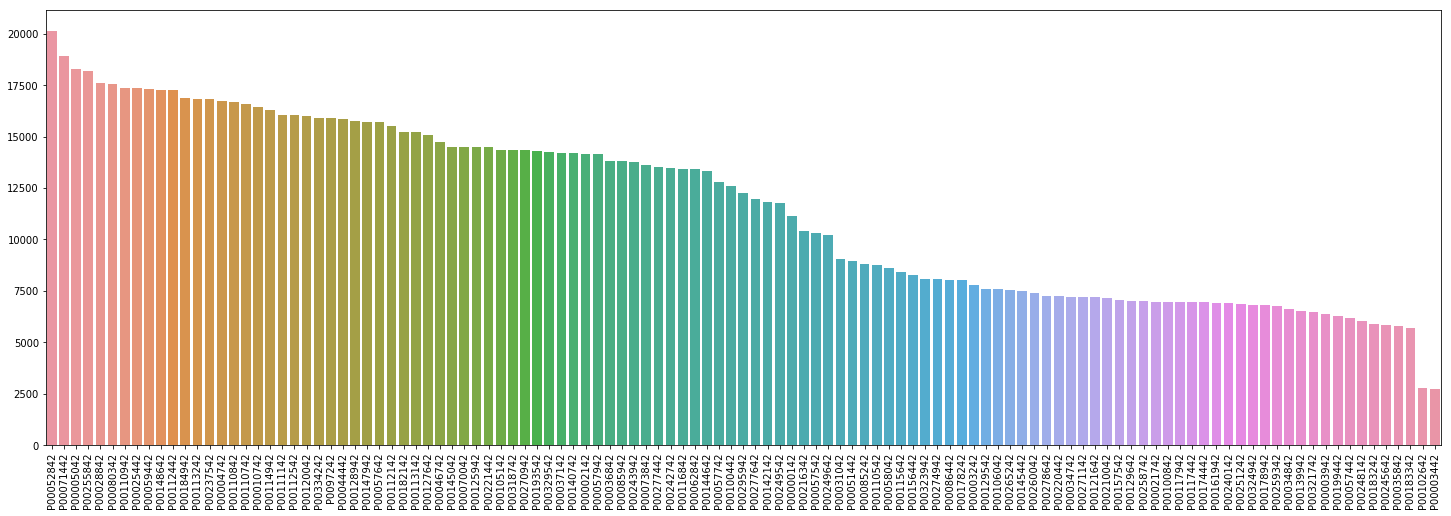

In [86]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))

s = sns.barplot(x=amt.index,y=amt['mean'].values)
s.set_xticklabels(labels=amt.index,rotation=90)


[Text(0,0,'P00052842'),
 Text(0,0,'P00071442'),
 Text(0,0,'P00005042'),
 Text(0,0,'P00255842'),
 Text(0,0,'P00028842'),
 Text(0,0,'P00080342'),
 Text(0,0,'P00110942'),
 Text(0,0,'P00025442'),
 Text(0,0,'P00059442'),
 Text(0,0,'P00148642'),
 Text(0,0,'P00112442'),
 Text(0,0,'P00184942'),
 Text(0,0,'P00113242'),
 Text(0,0,'P00237542'),
 Text(0,0,'P00004742'),
 Text(0,0,'P00110842'),
 Text(0,0,'P00110742'),
 Text(0,0,'P00010742'),
 Text(0,0,'P00114942'),
 Text(0,0,'P00111142'),
 Text(0,0,'P00112542'),
 Text(0,0,'P00120042'),
 Text(0,0,'P00334242'),
 Text(0,0,'P0097242'),
 Text(0,0,'P00044442'),
 Text(0,0,'P00128942'),
 Text(0,0,'P00147942'),
 Text(0,0,'P00057642'),
 Text(0,0,'P00112142'),
 Text(0,0,'P00182142'),
 Text(0,0,'P00113142'),
 Text(0,0,'P00127642'),
 Text(0,0,'P00046742'),
 Text(0,0,'P00145042'),
 Text(0,0,'P00070042'),
 Text(0,0,'P00125942'),
 Text(0,0,'P00221442'),
 Text(0,0,'P00105142'),
 Text(0,0,'P00318742'),
 Text(0,0,'P00270942'),
 Text(0,0,'P00193542'),
 Text(0,0,'P00329

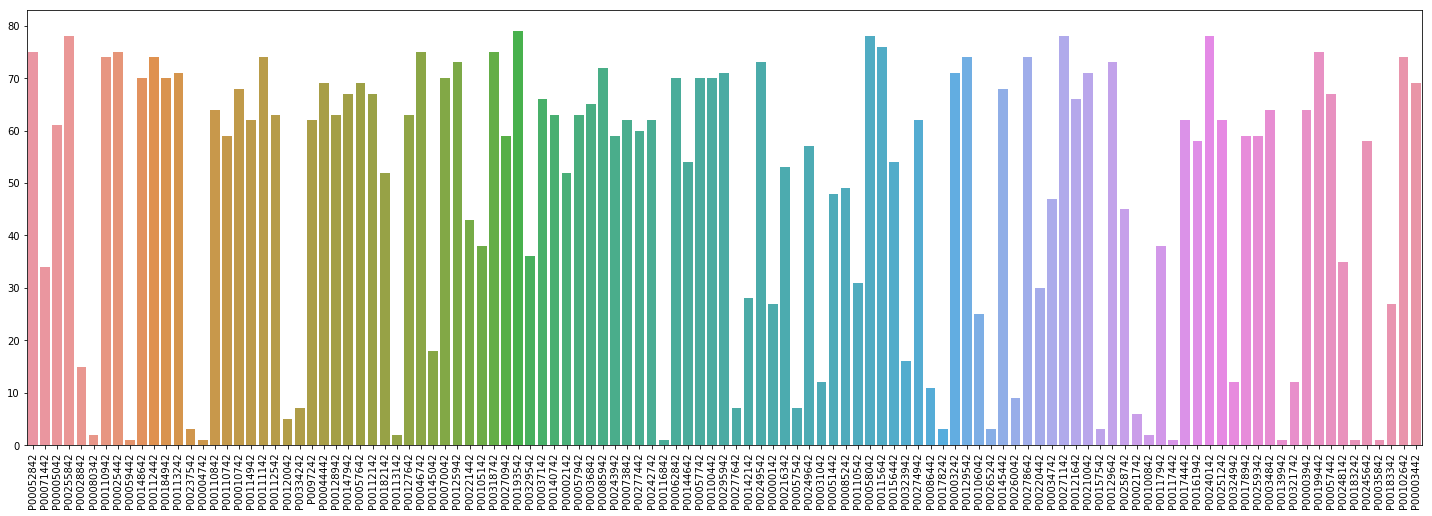

In [104]:
plt.figure(figsize=(25,8))

d = sns.barplot(x=tempval.index,y=tempval.notnull().sum(axis=1).values)
d.set_xticklabels(labels=amt.index,rotation=90)


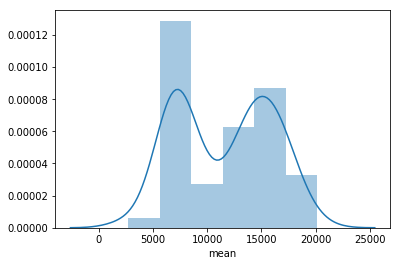

In [123]:
sns.distplot(amt['mean'])
# import plotly.express as px
# # tips = px.data.tips()
# fig = px.histogram(amt, x=amt['mean'], y=count(amt) ,marginal="rug")
# fig.show()

In [137]:
import plotly.figure_factory as px

hist_data = [amt['mean']]
group_labels = ['distplot'] # name of the dataset

fig = px.create_distplot(hist_data, group_labels,show_curve=False)
fig.show()

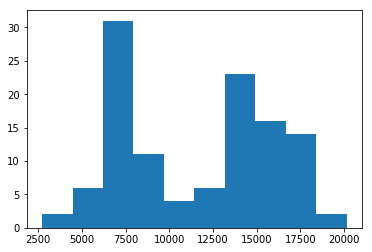

In [81]:
plt.hist(amt['mean']);

In [96]:
Df_CrossTab =  pd.crosstab(Reduced_DF['Product_ID'], Reduced_DF['Product_Category_1'])
#Df_CrossTab.to_csv("Product_Analysis.csv")
Df_CrossTab
# Df_CrossTab.values

Product_Category_1   1    2     3   4    5    6   7    8   9   10  11   12  \
Product_ID                                                                   
P00000142             0    0  1130   0    0    0   0    0   0   0   0    0   
P00000242             0  371     0   0    0    0   0    0   0   0   0    0   
P00000342             0    0     0   0  238    0   0    0   0   0   0    0   
P00000442             0    0     0   0   92    0   0    0   0   0   0    0   
P00000542             0    0     0   0  146    0   0    0   0   0   0    0   
P00000642           512    0     0   0    0    0   0    0   0   0   0    0   
P00000742             0    0     0   0  238    0   0    0   0   0   0    0   
P00000842             0   36     0   0    0    0   0    0   0   0   0    0   
P00000942            54    0     0   0    0    0   0    0   0   0   0    0   
P00001042           494    0     0   0    0    0   0    0   0   0   0    0   
P00001142             0    0     0   0  572    0   0    0   0   0   0    0   
P00001242             0    0     0   0   99    0   0    0   0   0   0    0   
P00001342             0    0    61   0    0    0   0    0   0   0   0    0   
P00001442             0    0     0   0    0    0   0   83   0   0   0    0   
P00001542            68    0     0   0    0    0   0    0   0   0   0    0   
P00001642             0    0     0   0    0    0   0  349   0   0   0    0   
P00001742             0    0     0   0    0    0   0  449   0   0   0    0   
P00001842             0    0     0   0    0    0   0    0   0   0   0    0   
P00001942             0    0     0   0  209    0   0    0   0   0   0    0   
P00002042            91    0     0   0    0    0   0    0   0   0   0    0   
P00002142           728    0     0   0    0    0   0    0   0   0   0    0   
P00002242             0    0     0   0    0  195   0    0   0   0   0    0   
P00002342             0    0     0   0    0    0   0    0   0   0   0    0   
P00002442             0    0     0   0    0    0   0  325   0   0   0    0   
P00002542             0    0     0   0    0    0   0  532   0   0   0    0   
P00002642             0    0     0   0    0    0   0   62   0   0   0    0   
P00002742             0    0     0   0    0    0   0   39   0   0   0    0   
P00002842             0    0     0   0    0    0   0    0   0   0   0    0   
P00002942             0  219     0   0    0    0   0    0   0   0   0    0   
P00003042             0    0     0   0    0    0   0   37   0   0   0    0   
...                 ...  ...   ...  ..  ...  ...  ..  ...  ..  ..  ..  ...   
P0096942              0    0   153   0    0    0   0    0   0   0   0    0   
P0097042              0    0     0   0    0   87   0    0   0   0   0    0   
P0097142              0    0     0   0    0    0   0    0   0   0   0  482   
P0097242            896    0     0   0    0    0   0    0   0   0   0    0   
P0097342            358    0     0   0    0    0   0    0   0   0   0    0   
P0097442              0    0     0   0    0    0   0    6   0   0   0    0   
P0097542              0    0     0   0    0    0   3    0   0   0   0    0   
P0097642              0    0     0   0    0    0   0    1   0   0   0    0   
P0097742              0    0     0   0    0    0   0  249   0   0   0    0   
P0097842              0    0     0   0  276    0   0    0   0   0   0    0   
P0097942              0    0     0   0    0    0   0   62   0   0   0    0   
P0098042              0    0     0   0    0    0   0   20   0   0   0    0   
P0098142              0    0     0   0    0    0   0   42   0   0   0    0   
P0098242            229    0     0   0    0    0   0    0   0   0   0    0   
P0098342            251    0     0   0    0    0   0    0   0   0   0    0   
P0098442              0    0     0   0    0    0  72    0   0   0   0    0   
P0098542              0    0     0   0    0    0   0   45   0   0   0    0   
P0098642              0    0     0   0    0   26   0    0   0   0   0    0   
P0098742              

Each user has bought the product only once 

Each product is coming under only one category

In [58]:
Reduced_DF.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Product_Category_1  Purchase  
0                  3      8370  
1                  1     15200  
2                 12      1422  
3                 12      1057  
4                  8      7969

In [59]:
Reduced_DF['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [61]:
Reduced_DF.groupby('Age').\
agg(['count', 'min', 'max', 'mean', 'sum'])['Purchase'].reset_index().sort_values('mean', ascending = False)

Age   count  min    max         mean         sum
5  51-55   37618  187  23960  9620.616620   361908356
6    55+   20903  187  23960  9453.898579   197614842
3  36-45  107499  185  23960  9401.478758  1010649565
2  26-35  214690  185  23961  9314.588970  1999749106
4  46-50   44526  186  23960  9284.872277   413418223
1  18-25   97634  185  23958  9235.197575   901669280
0   0-17   14707  187  23955  9020.126878   132659006

In [62]:
Reduced_DF.groupby('Occupation').\
agg(['count', 'min', 'max', 'mean', 'sum'])['Purchase'].reset_index().sort_values('mean', ascending = False)

Occupation  count  min    max         mean        sum
17          17  39090  186  23961  9906.378997  387240355
12          12  30423  187  23960  9883.052460  300672105
15          15  11812  200  23949  9866.239925  116540026
8            8   1524  193  23869  9576.508530   14594599
14          14  26712  197  23941  9568.536426  255594745
7            7  57806  187  23948  9502.175276  549282744
16          16  24790  199  23947  9457.133118  234442330
13          13   7548  193  23959  9424.449391   71135744
5            5  11985  209  23924  9388.848978  112525355
6            6  19822  188  23951  9336.378620  185065697
11          11  11338  185  23946  9299.467190  105437359
4            4  70862  185  23961  9279.026742  657530393
3            3  17366  188  23914  9238.077277  160428450
18          18   6525  206  23894  9233.671418   60249706
0            0  68120  188  23961  9186.946726  625814811
10          10  12623  187  23955  9052.836410  114273954
2            2  25845  197  23955  9025.938982  233275393
1            1  45971  185  23960  9017.703095  414552829
20          20  32910  186  23960  8881.099514  292276985
19          19   8352  185  23939  8754.249162   73115489
9            9   6153  209  23943  8714.335934   53619309

In [63]:
Reduced_DF.sort_values('Purchase', ascending=False)

User_ID Product_ID Gender    Age Occupation City_Category  \
87440   1001474  P00052842      M  26-35          4             A   
93016   1002272  P00052842      M  26-35          0             C   
370891  1003160  P00052842      M  26-35         17             C   
349658  1005848  P00119342      M  51-55         20             A   
503697  1005596  P00117642      M  36-45         12             B   
292083  1003045  P00052842      M  46-50          1             B   
321782  1001577  P00052842      M    55+          0             C   
437804  1001387  P00086242      F  51-55         13             B   
298378  1003947  P00116142      M  26-35          0             C   
373300  1003511  P00085342      M  51-55          0             C   
7542    1001178  P00116142      M    55+          0             C   
229329  1005367  P00085342      M  18-25          4             A   
416883  1004117  P00161842      M  18-25          4             B   
33268   1005102  P00052842      M  26-35         12             C   
366333  1002359  P00085342      M    55+         13             C   
388010  1005716  P00052842      M   0-17         10             C   
449656  1003301  P00086242      F  26-35          2             B   
56879   1002788  P00085342      M    55+          1             B   
54364   1002274  P00052842      M  18-25          2             B   
126614  1001509  P00159542      M   0-17          0             B   
68926   1004520  P00116142      M  26-35          4             C   
321556  1001519  P00200642      M  18-25          4             C   
366147  1002313  P00052842      F  51-55          6             C   
342015  1004610  P00052842      F  26-35          4             B   
46923   1001216  P00086242      M  26-35          2             A   
132321  1002340  P00119342      M  36-45          2             A   
75373   1005622  P00085342      M  36-45         15             C   
170551  1002288  P00086242      M   0-17         10             B   
121808  1000837  P00085342      M    55+          7             C   
139056  1003505  P00117642      F  26-35         15             A   
...         ...        ...    ...    ...        ...           ...   
85314   1001178  P00132042      M    55+          0             C   
278779  1001010  P00171342      M  26-35          0             A   
289428  1002605  P00135542      M  36-45          7             C   
422631  1005039  P00066742      F  36-45          4             B   
295724  1003603  P00173042      F  36-45          7             B   
377657  1004085  P00041442      F  26-35          6             A   
483037  1002351  P00102142      F  26-35          0             B   
445871  1002672  P00227542      M  36-45          7             C   
196295  1000300  P00227542      M  26-35          7             B   
280165  1001185  P00135142      F  36-45          1             C   
21243   1003359  P00149342      M  26-35         20             C   
276092  1000563  P00173042      M  26-35          4             A   
454981  1004028  P00041442      M  26-35          4             A   
82524   1000752  P00273842      F  26-35          3             A   
32440   1004977  P00173042      M  26-35          4             B   
135690  1002967  P00283142      M  26-35          0             A   
201772  1001150  P00132042      F  26-35         20             A   
530836  1003762  P00200442      M  51-55          6             B   
172340  1002660  P00087142      M    55+         17             C   
6609    1001066  P00200442      M  46-50         12             C   
345191  1005120  P00066742      M  51-55          7             A   
514048  1001198  P00212042      M   0-17         10             C   
5466    1000889  P00041442      M  46-50         20             A   
266446  1005039  P00032642      F  36-45          4             B   
400498  1001630  P00135542      M  46-50         17             C   
233619  1006025  P00041442      F  26-35          1             B   
27602 

### Boxplot to identify outliers

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

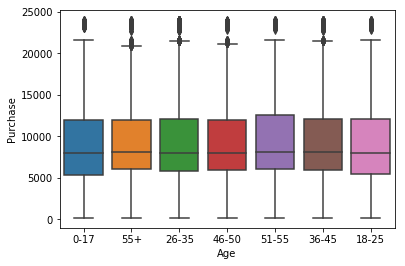

In [67]:
sns.boxplot(x='Age', y='Purchase', data=Reduced_DF)

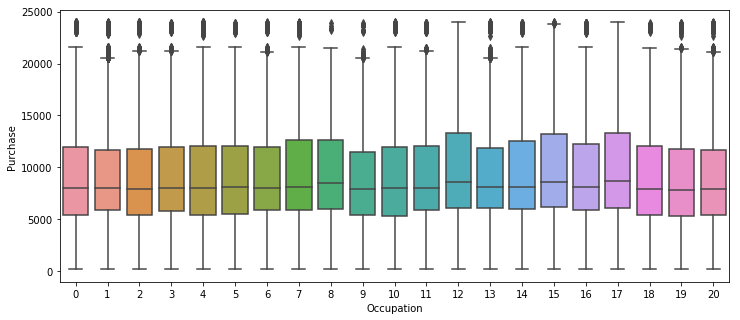

In [33]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Occupation', y='Purchase', data=Reduced_DF)

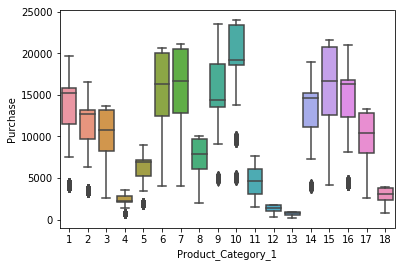

In [70]:
sns.boxplot(x='Product_Category_1', y='Purchase', data=Reduced_DF)

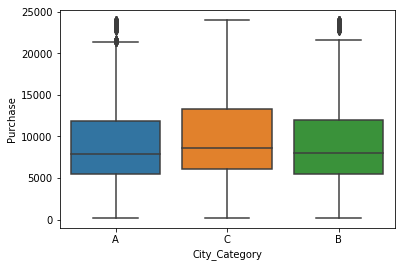

In [71]:
sns.boxplot(x='City_Category', y='Purchase', data=Reduced_DF)

In [9]:
df

NameError: name 'df' is not defined

### implement k mode

In [73]:
def similarity_score(x,y):
    count = 0
    for i in range(len(x)):
        if x[i]==y[i]:
            count +=1
    return count

In [ ]:
def kmodes(data,clusters,iterations):
    index=np.random.permutation(data.index)[:clusters]#randomly selecting index values for initial k modes
    modes=[]
    labels=[]
    dis=[]
    J=[]
    d=dict()
#calculating the dissimilarity score between each categorical object from the modes and assigning label to minimum score
    for i in index:
        modes.append(np.array(data.ix[i]))#inital k modes added 
    for i in range(len(data)):
        dis=[]
        for j in range(len(modes)):
            dis.append(similarity_score(np.array(data.ix[i]),modes[j]))
        labels.append(np.argmin(dis))
    data['label']=np.array(labels)
#using frequency based method to update the weights
    for i in range(iterations):
        modes=[]
        labels=[]
        for i in np.unique(data['label']):
            modes.append(np.array(data.ix[data['label']==i,:-1].describe().ix[2,:]))

#calculating the diss score between each categorical object and updated modes and assigning new label to minimum score
        for i in range(len(data)):
            dis=[]
            for j in range(len(modes)):
                dis.append(similarity_score(np.array(data.ix[i,:-1]),modes[j]))
            labels.append(np.argmin(dis))
        data['label']=np.array(labels)

#calculating the cost function of individual cluster
    for i in range(len(modes)):
        dis=[]
        for j in range(len(data.ix[data['label']==i,:-1])):
            dis.append(similarity_score(np.array(data.ix[data['label']==i,:-1].iloc[j]),modes[i]))
        J.append(sum(dis))
    d['modes']=modes
    d['costfunction']=J
    d['totalcost']=sum(J)
    d['data']=data
    return d

In [49]:
x=blackfriday_df.groupby(['User_ID','Product_ID']).size()
x = pd.DataFrame(x)
x

0
User_ID Product_ID   
1000001 P00000142   1
        P00004842   1
        P00025442   1
        P00051442   1
        P00051842   1
        P00058142   1
        P00059442   1
        P00064042   1
        P00069042   1
        P00074142   1
        P00085442   1
        P00085942   1
        P00087842   1
        P00102642   1
        P00110842   1
        P00111842   1
        P00117942   1
        P00142242   1
        P00165942   1
        P00178242   1
        P00178342   1
        P00183942   1
        P00184942   1
        P00210342   1
        P00214842   1
        P00220642   1
        P00248442   1
        P00248942   1
        P00255842   1
        P00258742   1
...                ..
1006040 P00259042   1
        P00259842   1
        P00265242   1
        P00266642   1
        P00271042   1
        P00271242   1
        P00276342   1
        P00277442   1
        P00277842   1
        P00280442   1
        P00280542   1
        P00285342   1
        P00286842   1
        P00287942   1
        P00288042   1
        P00288242   1
        P00288642   1
        P00289642   1
        P00291942   1
        P00295342   1
        P00296642   1
        P00300542   1
        P00310842   1
        P00311642   1
        P00323942   1
        P00329242   1
        P00331942   1
        P00343042   1
        P00346242   1
        P00349442   1

[537577 rows x 1 columns]

In [45]:
for i in rfm['Row Labels']:
    if i in x['User_ID']:
        print(i)

KeyError: 'User_ID'

1

In [12]:
rfm = pd.read_csv('CrossTab_UserId_Details_RFMScore .csv',header=1)
rfm.shape

(5893, 9)

In [8]:
rfm[rfm['RFMSCORE along Table (Down)']==55]

Row Labels  Frequency_Ranking along Table (Down)  Number of Records  \
9       1000010                                   5.0              222.0   
17      1000018                                   5.0              179.0   
22      1000023                                   5.0              171.0   
25      1000026                                   5.0              226.0   
32      1000033                                   5.0              215.0   
35      1000036                                   5.0              199.0   
45      1000048                                   5.0              337.0   
50      1000053                                   5.0              377.0   
55      1000058                                   5.0              260.0   
59      1000062                                   5.0              281.0   
89      1000092                                   5.0              223.0   
113     1000117                                   5.0              282.0   
119     1000123                                   5.0              352.0   
132     1000136                                   5.0              227.0   
142     1000146                                   5.0              238.0   
144     1000148                                   5.0              338.0   
145     1000149                                   5.0              333.0   
147     1000151                                   5.0              283.0   
153     1000157                                   5.0              217.0   
157     1000161                                   5.0              184.0   
159     1000163                                   5.0              271.0   
162     1000166                                   5.0              216.0   
165     1000169                                   5.0              312.0   
169     1000173                                   5.0              314.0   
183     1000187                                   5.0              243.0   
188     1000192                                   5.0              284.0   
191     1000195                                   5.0              466.0   
194     1000198                                   5.0              207.0   
195     1000199                                   5.0              206.0   
198     1000202                                   5.0              379.0   
...         ...                                   ...                ...   
5632    1005779                                   5.0              196.0   
5640    1005787                                   5.0              221.0   
5641    1005788                                   5.0              423.0   
5647    1005795                                   5.0              680.0   
5664    1005812                                   5.0              454.0   
5676    1005824                                   5.0              281.0   
5683    1005831                                   5.0              667.0   
5689    1005837                                   5.0              286.0   
5693    1005841                                   5.0              177.0   
5698    1005847                                   5.0              206.0   
5699    1005848                                   5.0              224.0   
5703    1005852                                   5.0              180.0   
5705    1005854                                   5.0              217.0   
5728    1005878                                   5.0              318.0   
5730    1005880                                   5.0              392.0   
5736    1005886                                   5.0              255.0   
5738    1005888                                   5.0              312.0   
5740    1005890                                   5.0              179.0   
5766    1005916                                   5.0              346.0   
5798    1005948                                   5.0              208.0   
5800    1005950                                   5.0